
# **IE0005 EL07 Group 16 Mini-Project - Telecom Customer Churn Prediction**


**Team Members:**  
* Eileen Teoh Yan Zhen  
* Brandon Lennard Wong Hong Xing  
* Loh Zhe Hong  
* Teoh Jing Hern  

Dataset from Kaggle : "Telco Customer Churn dataset" by BlastChar  
Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

---



**1. Data Preparation**   
* Import necessary libraries ✅
* Load dataset ✅
* Check first few rows ✅
* Get dataset info (stats summary) ✅

**2. Data Preprocessing (1)**   
* Remove irrelevant features ✅
* Convert data types ✅
* Handle missing values -> Drop or fill missing values  ✅
* Identify Categorical Columns + Numerical Columns ✅
* Encode cat variables ✅
* Handling outliers ✅

**3. Data Visualisation (Exploratory Analysis) + Further Data Cleaning**
* Uni-variate Analysis (count: cat; hist/kde: num) ✅
* Bivariate Analysis (Exploring relationships between features and churn) + correlation heatmap  ✅
* Churn specific insights ✅

**4. Data Preprocessing (2) + ML Model training + Evaluation**
* Feature engineering (Label encod + Standardised) ✅
* Train test split ✅
* Train + Evaluate multiple classfiers ✅
  - Decision Tree ✅
  - KNN ✅
  - Logistic Regression ✅
  - SVC ✅
  - Random Forest ✅
  - Adaboost ✅
  - CatBoost ✅
  - XGBoost ✅
  - LightGBM ✅
* Feature Importance -> Modelling ✅
* Fine tune hyperparameters ✅

**5. Findings + Conclusion**
* Compare Models ✅
* Summarise key insights ✅
* Interpret important features ✅
* Suggest business actions to reduce churn ✅



---
# <font color='blue'>**Objective**</font>


The goal of this project is to predict customer churn based on their information and past interactions. By analysing the dataset, we aim to understand the key factors that influence customer retention and apply machine learning techniques to build a model capable of predicting whether a customer will churn. This can help businesses to take proactive measures to retain valuable customers and improve customer satisfaction.



---
# <font color='blue'>**1. Data Preparation**</font>

## <font color='blue'>**Import Essential Libraries**</font>

Begin by importing the essential Python Libraries



In [7]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [9]:
# Mount Google Drive to access datasets as we using Google Colab
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'

## <font color='blue'>**Load the Dataset**</font>

In [11]:
# df = pd.read_csv(file_path)

# For normal Jupyter Notebook
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head() # Check first few rows

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## **<font color='blue'>Get Dataset Information </font>**

In [13]:
df.shape

(7043, 21)

* This dataset contains **7043 rows, 21 columns**

In [15]:
# Check the datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This dataset includes:
*   Demographic info about customers - **gender, if they are senior citizen, if they have partners and dependents**
*   Services each customer signed up for - **phone service, multiple lines, internet service, online security, online backup, device protection, tech support, and streaming TV and movies**
*   Customer account info - **tenure(no.of months they have stayed with the company), contract term, if they have paperless billing, payment method (e.g. bank transfer/credit card), monthly charges, total charges**
*   Customers who left within the last month - **churn**

In [18]:
# Numerical Stats Summary
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

---
# <font color='blue'>**2. Data Preprocessing (1)**</font>
To clean the dataset

## **<font color='blue'>Drop Unnecessary Columns </font>**

* Since `customerID` is just an identifier and has no meaning to our data, thus remove it

In [21]:
df_new = df.drop(['customerID'], axis = 1) # Removing "customerID" column from the dataset
df_new

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

## **<font color='blue'>Concert the DataTypes</font>**
* Convert `TotalCharges` from object to numeric float as it contains decimal points

In [23]:
# Check for WhiteSpaces in Total Charges
print((df_new['TotalCharges'].str.strip() == '').sum())

11


* There is a total of **11 rows of whitespaces** in `TotalCharges` which need to be fixed in order for us to convert the datatypes.

In [25]:
# Replace Whitespace with NaN
df_new['TotalCharges'] = df_new['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

In [26]:
# Convert TotalCharges to float
df_new['TotalCharges'] = df_new['TotalCharges'].astype('float64')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [27]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## **<font color='blue'>Handle Missing Values</font>**
* After replacing whitespaces with NaN, there should be some indirect missingness in our data.

In [29]:
# Check missing values in data
df_new.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Here, we can see that there is **11 missing values** in `TotalCharges` and thus we should check on this data.

In [31]:
# Print the rows of missing values
print(df_new[df_new['TotalCharges'].isna()])

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

* In addition to the `TotalCharges` column, we also notice an **anomaly in the `Tenure` column**, where all 11 missing TotalCharges rows had tenure = 0. However, MonthlyCharges were not empty, which is inconsistent because if tenure = 0, the customer likely never completed a billing cycle. Yet, they still had assigned MonthlyCharges, suggesting they selected a plan but didn’t start using it.

* Thus, we need to check on the `tenure` column.





In [33]:
# Find the rows where tenure = 0
df_new[df_new['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* All the rows where `tenure` is 0 also have `TotalCharges` with missing (NaN) values. Therefore, we decided to remove these rows, as there are only 11 such entries, and deleting them will not significantly affect the dataset.

In [35]:
# Drop all the tenure = 0 rows
df_new2 = df_new.drop(df_new[df_new['tenure'] == 0].index, axis=0) #axis=0 => rows!

# Check again the rows where tenure = 0
df_new2[df_new2['tenure'] == 0].index

Index([], dtype='int64')

* We can confirm that there are no longer any rows with tenure = 0. Next, we will check for missing values again, and there should be no more missing values in the `TotalCharges` column.

In [37]:
df_new2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
# Check the new data info
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [39]:
df_new2.shape

(7032, 20)

---
# <font color='blue'>**3. Data Visualisation (Exploratory Analysis) + Further Data Cleaning**</font>

To gain deeper understanding of the data and identify which variable had a greater impact on the target variable `Churn` and on the way we clean the dataset.


# <font color='red'>**Uni-Variate Analysis**</font>

## **<font color='blue'> 📌 Demographics</font>**
Let us first understand the demographics of the customers.

### **Gender Distribution**

gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64


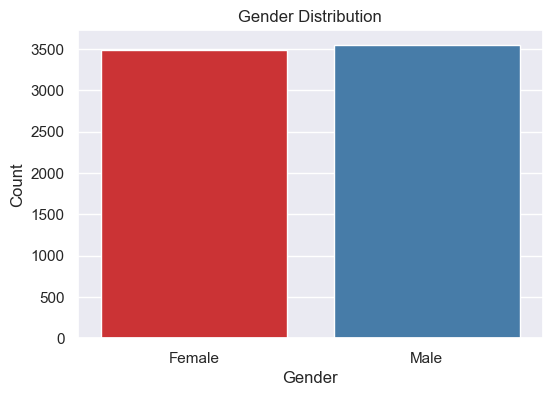

In [44]:
# Plot gender distribution using a bar plot
plt.figure(figsize=(6, 4))
ax = sb.countplot(data=df_new2, x='gender', hue='gender', palette='Set1', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

gender_distribution = df_new2['gender'].value_counts(normalize=True) * 100
print(gender_distribution)

plt.show()

* About half of the customers in our dataset are male - 50% while the other half are female - 50%.

### **Senior Citizen Distribution**

SeniorCitizen
0    83.759954
1    16.240046
Name: proportion, dtype: float64


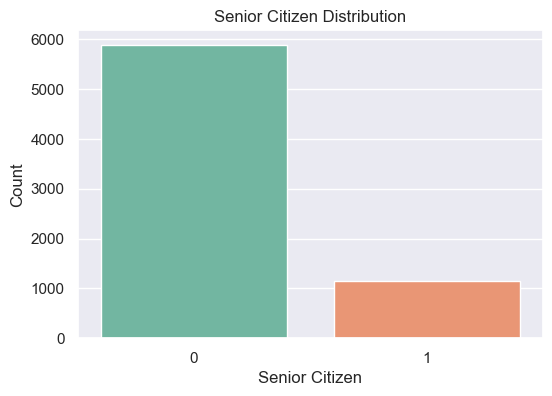

In [47]:
# Plot gender distribution using a bar plot
plt.figure(figsize=(6, 4))
ax = sb.countplot(data=df_new2, x='SeniorCitizen', hue='SeniorCitizen', palette='Set2', legend=False)
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

senior_distribution = df_new2['SeniorCitizen'].value_counts(normalize=True) * 100
print(senior_distribution)

plt.show()

* There are **only 16%** of the customers who are **senior citizens**. Therefore, most of our customers in the dataset are younger or middle-aged customers - 83%.

> Reco for company:
- Offer special discounts or tailored plans for senior citizens to encourage more engagement.
- Simplify digital services for senior citizens to enhance their experience.

## **<font color='blue'>📌 Customer Account Information</font>**
Let us now look at customer account information.

### **Tenure Distribution**

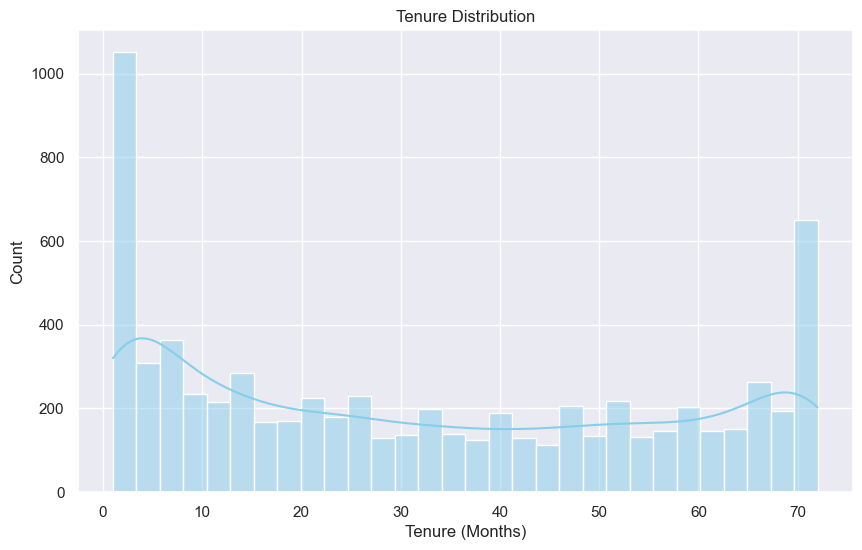

In [51]:
# Plot tenure distribution using a histogram
plt.figure(figsize=(10, 6))
ax = sb.histplot(data=df_new2, x='tenure', bins=30, kde=True, color='skyblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

* From the histogram above, we can see that a lot of customers have been with the telecom company for just one month, while a significant number stay for about 72 months.

* This indicates early churn issues. This pattern could also be attributed to the fact that customers are on different types of contracts. Depending on the type of contract they have, it may be easier or harder for them to stay with or leave the telecom company. This is what we would like to find out while exploring the dataset.

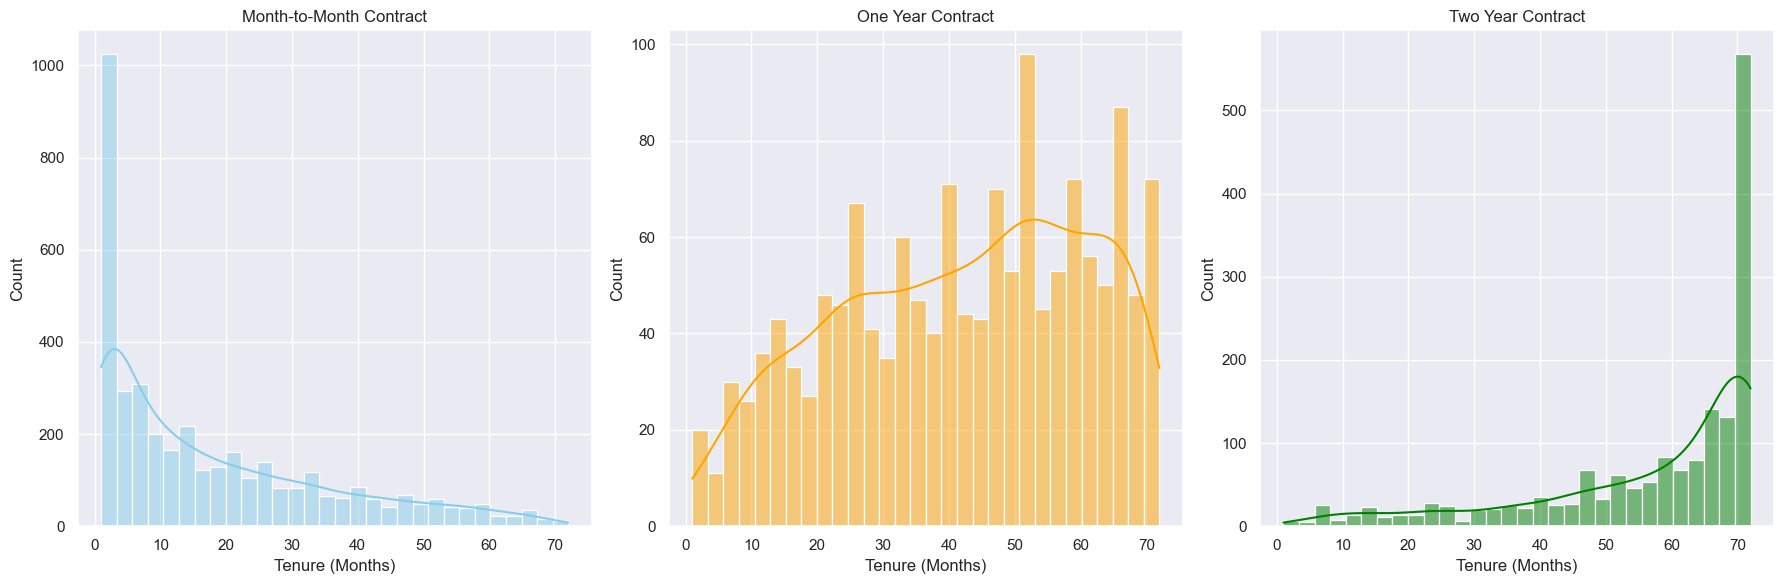

In [53]:
# Create separate histograms for each contract type
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Month-to-Month
sb.histplot(data=df_new2[df_new2['Contract'] == 'Month-to-month'], x='tenure', bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Month-to-Month Contract')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Count')

# One Year
sb.histplot(data=df_new2[df_new2['Contract'] == 'One year'], x='tenure', bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('One Year Contract')
axes[1].set_xlabel('Tenure (Months)')
axes[1].set_ylabel('Count')

# Two Year
sb.histplot(data=df_new2[df_new2['Contract'] == 'Two year'], x='tenure', bins=30, kde=True, color='green', ax=axes[2])
axes[2].set_title('Two Year Contract')
axes[2].set_xlabel('Tenure (Months)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

* Most monthly contracts last only 1–2 months (early churn issues), whereas two-year contracts typically extend to around 70 months.

* This suggests that customers who commit to longer contracts tend to be more loyal and remain with the company for a significantly longer period.

### **Contract Types Distribution**

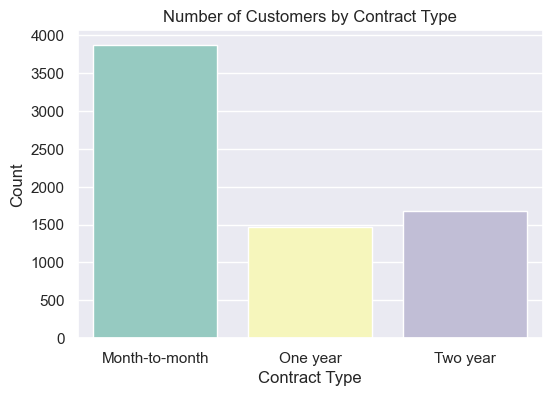

In [56]:
# Find out different types of contract they have
plt.figure(figsize=(6, 4))
ax = sb.countplot(data=df_new2, x='Contract', hue='Contract', palette='Set3', legend=False)
plt.title('Number of Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

* From the graph, most customers are on month-to-month contracts, while an equal number are on one-year and two-year contracts.

* This shows varying commitment levels, with month-to-month being the most popular due to flexibility, and equal interest in longer-term contracts, likely driven by incentives or perceived value.

## **<font color='blue'>📌 Services Used</font>**

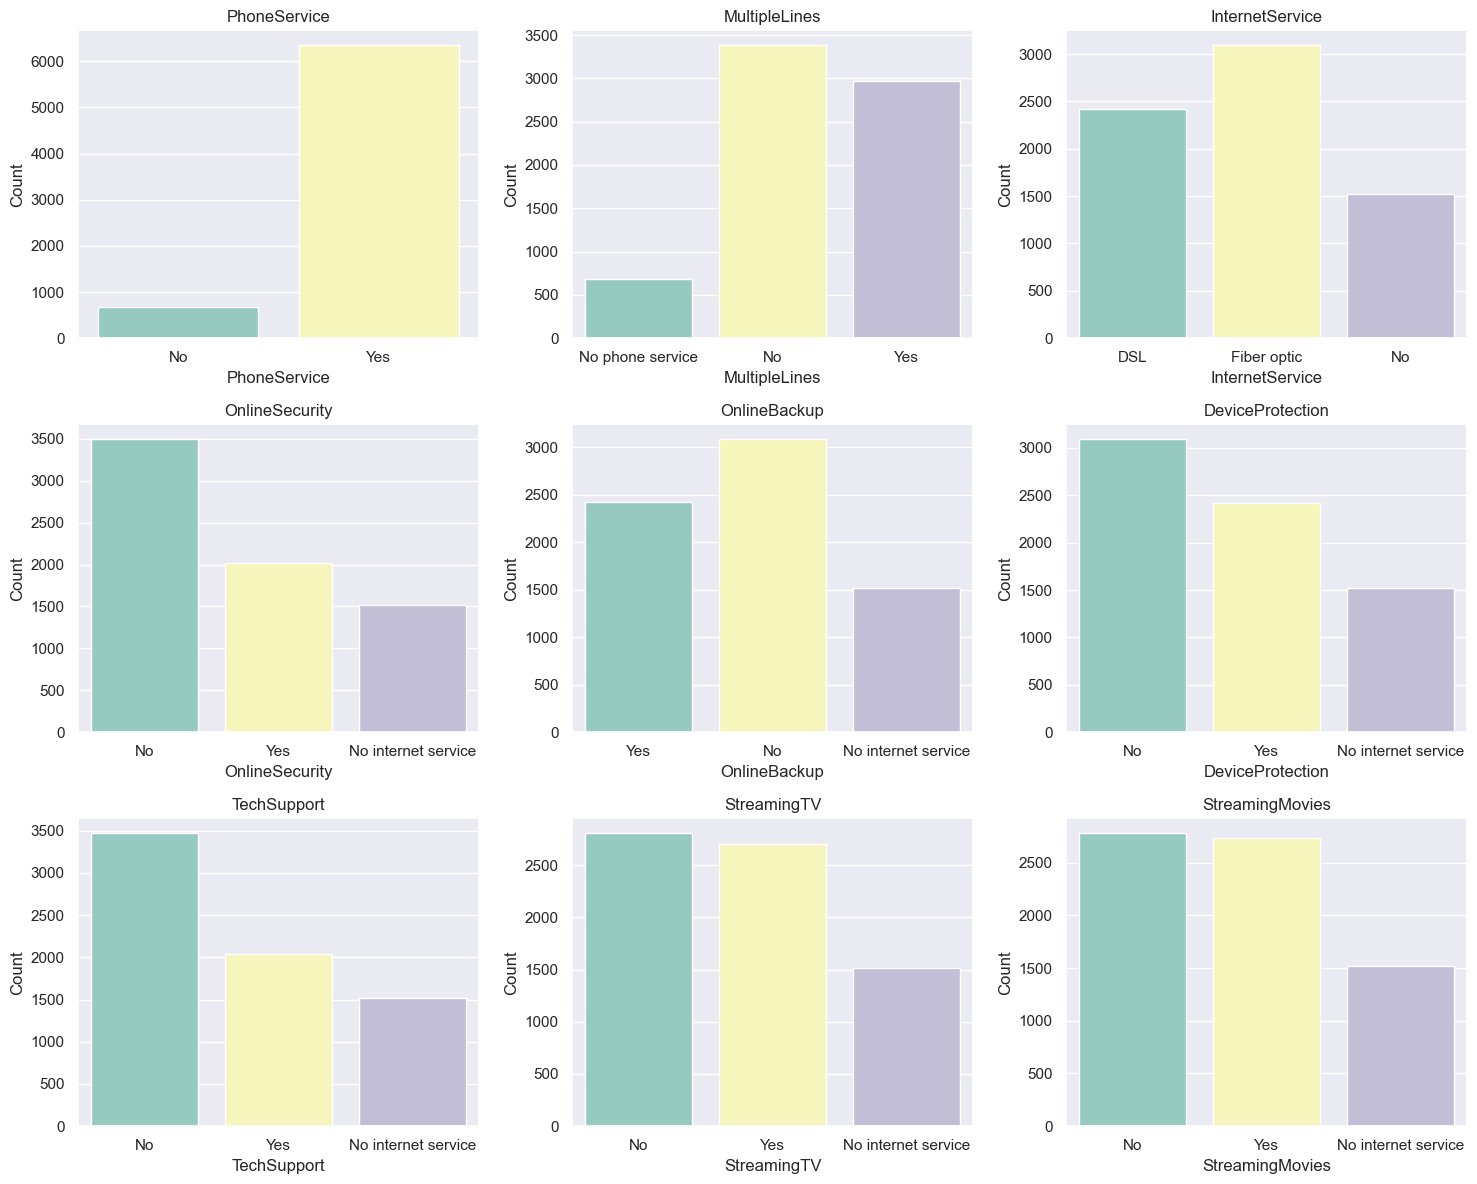

In [59]:
# Group all the services together
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Visualise all the services
f, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

for count, service in enumerate(services):
    sb.countplot(data=df_new2, x=service, hue=service, palette='Set3', legend=False, ax=axes[count])
    axes[count].set_title(service)
    axes[count].set_xlabel(service)
    axes[count].set_ylabel('Count')

# Adjust layout for better spacing, ensuring the title not squeeze together
plt.tight_layout()
plt.show()

**1. Phone Service**  
- The majority of customers **subscribe to phone services**.  

**2. Multiple Lines**  
- More customers **opt for a single line rather than multiple lines**.  

**3. Internet Service**  
- **Fiber Optic** is the most preferred internet service, surpassing DSL and customers without internet.  
* → Solution: Invest to improve Fiber Optics, offer promotions to attract DSL users, and encourage customers without internet to subscribe with special offers

**4. Online Security**  
- A significant portion of customers **do not subscribe to online security services**.  

**5. Online Backup**  
- Many customers **do not use online backup services**.  
* → Solution: Increase awareness of data security benefits and offer bundled plans or discounted add-ons to encourage adoption.

**6. Device Protection**  
- A large number of customers **do not opt for device protection plans**.  
* → Solution: Educate customers on the importance of Device Protection through marketing campaigns, offer trial periods, or bundle it with internet services.

**7. Tech Support**  
- The majority of customers **do not utilize tech support services**.  
* → Solution: Improve customer awareness about the benefits of Tech Support, offer 24/7 support, and provide discounted support packages to increase engagement.

**8. Streaming TV**  
- Slightly more customers **do not subscribe to streaming TV services than those who do**.  
* → Solution: Offer exclusive content, bundle Streaming TV with internet plans, and provide discounted packages to increase subscriptions.

**9. Streaming Movies**  
- Similarly, a slightly higher number of customers **do not subscribe to streaming movie services** compared to those who do.  
* → Solution: Promote partnerships with popular streaming platforms, offer exclusive deals, and introduce trial periods to attract more users.

Thus, an interesting fact that we can conclude from our findings in the dataset is majority of the customers do not opt for additional maintanence services like online security, online backup , tech support and device protection. They might see these services insignificant.Telco Packages without these services with lower price might stand out from other competitors and prevent people from churning.

<u>Some suggestions for the business:  </u>  
💸 Offer lower-cost core packages (without add-ons) to attract price-sensitive users.

🎁 Promote bundled deals for add-on services (e.g., security + backup).

📢 Educate customers on the value of support & protection services.

🎬 Boost streaming service subscriptions through exclusive content and promotions.

## **<font color='blue'>📌 Target Variable</font>**
### **Churn Distribution**
Visualise the distribution of the target variable `Churn` and understand its interaction with other important variables as was found out in the correlation plot.

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


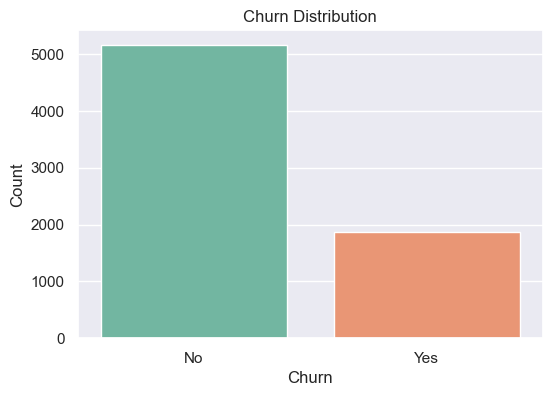

In [62]:
# Check exact ratio of the classes
churn_distribution = df_new2['Churn'].value_counts(normalize=True) * 100
print(churn_distribution)

# Plot the catplot of Churn
plt.figure(figsize=(6, 4))
sb.countplot(data=df_new2, x='Churn', hue='Churn', palette='Set2', legend=False)  # Using 'hue' as 'Churn' and turning off the legend
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

* From the countplot of `Churn`, it is noticeable that there is a **huge imbalanced**, where the number of customers who churn (Yes) is significantly lower than those who do not churn (No). This imbalance can lead to **biased model performance**, as the model may tend to predict the majority calss more often, resulting in poor performance for the minority class.

  * Almost 73% of the customers continue with the company and didn't churn.
  * Almost 27% of the customers didn't continue with the company and churned.

* This imbalance is crucial to consider during modeling, as it could result in many false negatives. In the modeling section, we will explore strategies to address and mitigate the effects of data skewness.


# <font color='red'>**Data Cleaning**</font>

## <font color='blue'>**Label Encoder - Data Cleaning**</font>

To allow the model to process the data efficiently, we replace "Yes" and "No" with 1 and 0 in `Churn` respectively

In [66]:
le = LabelEncoder()
df_new2['Churn']=le.fit_transform(df_new2['Churn'])

In [67]:
df_new2['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

## <font color='blue'>**Numerical & Categorical Columns**</font>

For further usage, lets get a list of numerical and categorical features.

In [69]:
numerical= df_new2.select_dtypes('number').columns

categorical = df_new2.select_dtypes('object').columns

print("Numerical Columns:")
print(df_new2[numerical].columns)
print('\n')
print("Categorical Columns:")
print(df_new2[categorical].columns)

Numerical Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


Categorical Columns:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


# <font color='red'>**Bi-Variate Analysis with Churn**</font>

Lets start with bivariate analysis with our target variable `Churn`

# <font color='red'>**Numerical Features Analysis**</font>

## <font color='blue'>**Statistic Summary**</font>

In [73]:
# Check for the stats summary for numerical data
df_new2[numerical].describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000
mean        0.162400    32.421786       64.798208   2283.300441     0.265785
std         0.368844    24.545260       30.085974   2266.771362     0.441782
min         0.000000     1.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.587500    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.862500   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

## <font color='blue'>**Monthly Charges vs Total Charges**</font>

MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651065
TotalCharges          0.651065      1.000000

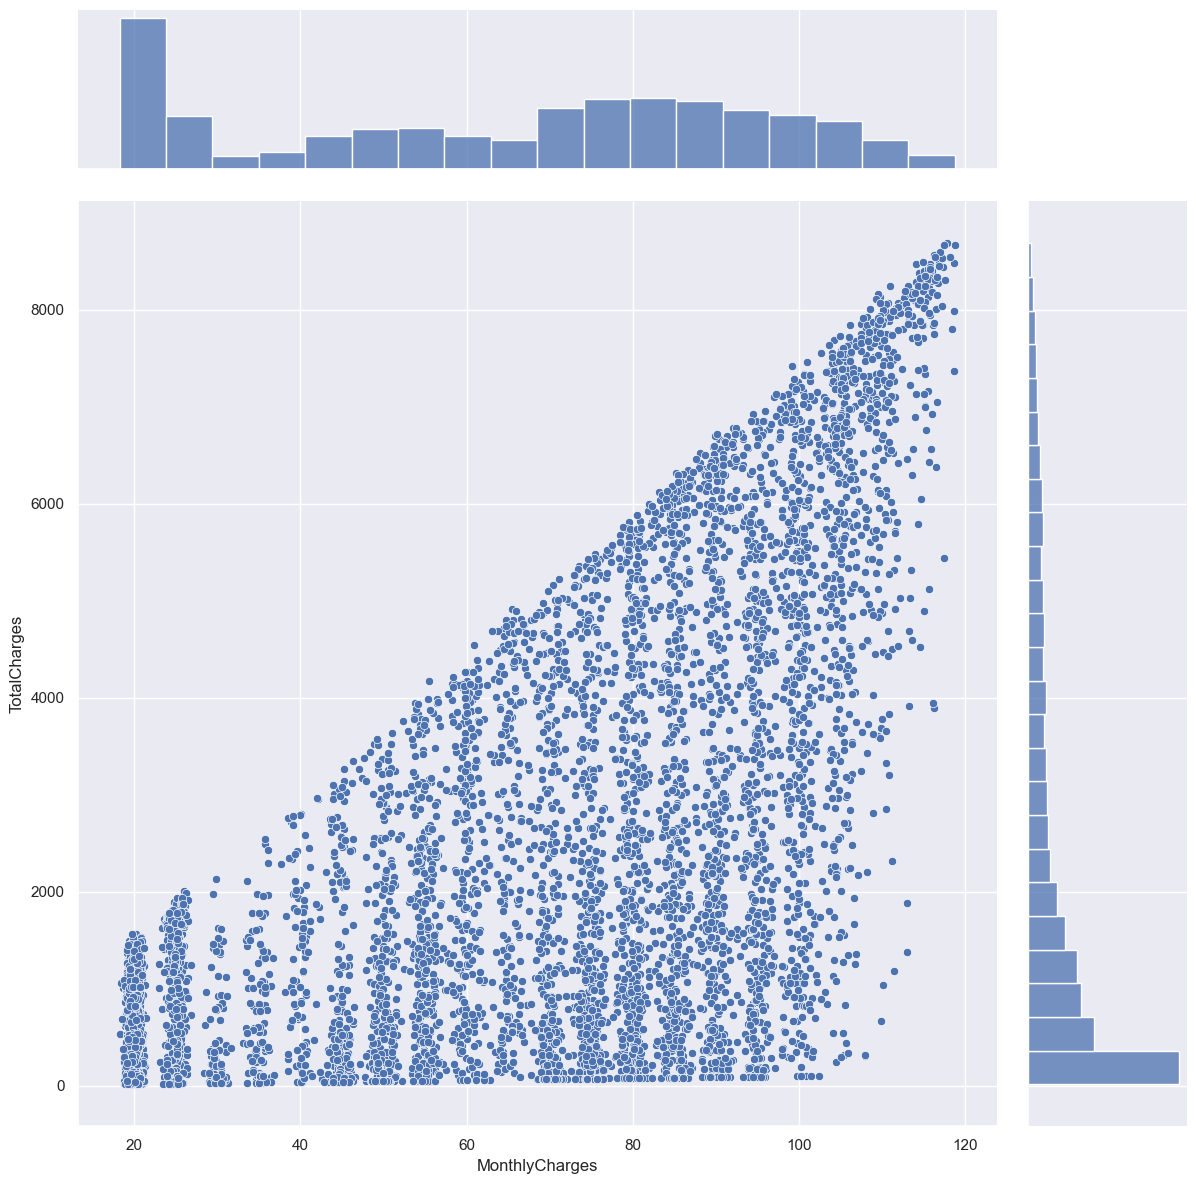

In [75]:
# Create a joint dataframe by concatenating the two variables
jointDF = df_new2[['MonthlyCharges', 'TotalCharges']]

# Jointplot of MonthlyCharges against TotalCharges
sb.jointplot(data=jointDF, x="MonthlyCharges", y="TotalCharges", height=12)

jointDF.corr()

* This demonstrates a **linear relationship** between **monthly and total charges**, where total charges rise as the customer's monthly bill increases.

## <font color='blue'>**Monthly Charges vs Churn**</font>

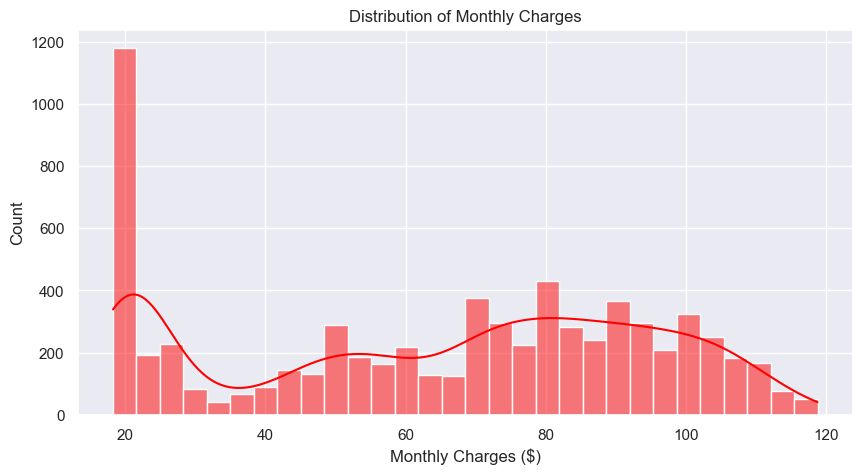

In [78]:
# Create histogram for monthly charges
plt.figure(figsize=(10, 5))
sb.histplot(df_new2['MonthlyCharges'], bins=30, kde=True, color='red')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

Monthly charges has a big range. To visualise the data more usefully, we will categorise them into 3 levels which are low, mid and high.

Churn                        0          1
MonthlyCharges_bins                      
Low                  90.163934   9.836066
Mid                  75.609756  24.390244
High                 64.618822  35.381178


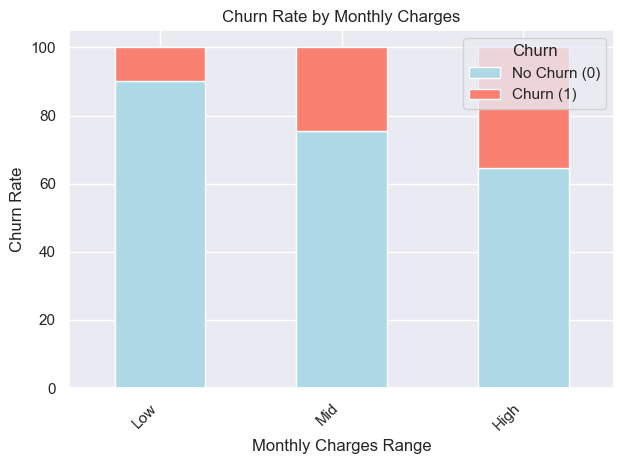

In [80]:
# Bin MonthlyCharges into categories
bins=[0,30,70,df_new2['MonthlyCharges'].max()]
labels=['Low','Mid','High']
df_new2['MonthlyCharges_bins'] = pd.cut(df_new2['MonthlyCharges'], bins=bins, labels=labels)

# Calculate churn percentage for each MonthlyCharges bin
monthlyCharges_churn_percentage = df_new2.groupby('MonthlyCharges_bins', observed = False)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Print the churn percentages
print(monthlyCharges_churn_percentage)

# Plot stacked bar plot for churn percentage
monthlyCharges_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges Range')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'], loc='upper right')

plt.tight_layout()
plt.show()

*   There are a significant of customer spends only $20 a month.

* Low-paying ($0-$30/month) customers have the lowest churn rate, meaning they are more likely to stay.

* Mid-range ($30-$70/month) customers have a slightly higher churn rate, indicating possible dissatisfaction and may be exploring other competitors. → Solution: improve service quality or offer competitive features.

* **High-paying (>$70/month)** customers show the **highest churn rate**, suggesting they may find the service too expensice or not worth the cost. → Solution: introduce loyalty programs, discounts, premium benefits to retain them.




## <font color='blue'>**Tenure vs Churn**</font>

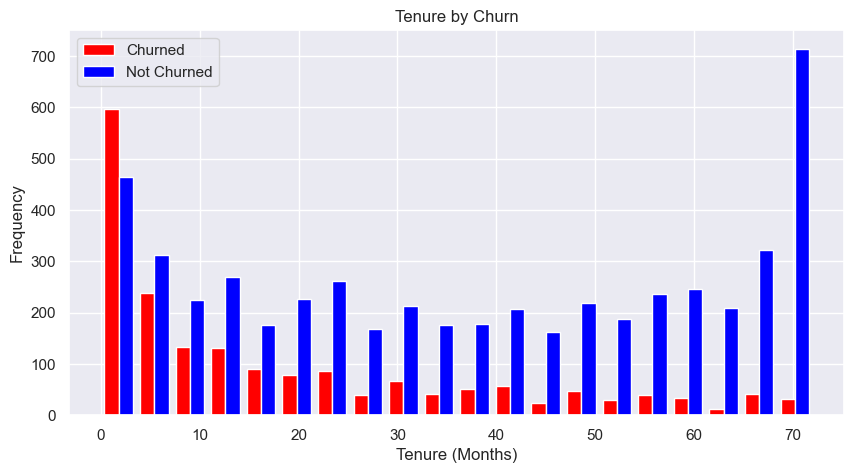

In [83]:
# Filter data for churned and not churned customers
churned = df[df["Churn"] == "Yes"]
not_churned = df[df["Churn"] == "No"]

plt.figure(figsize=(10, 5))
plt.hist([churned["tenure"], not_churned["tenure"]], bins=20, label=["Churned", "Not Churned"], color=['red', 'blue'])

plt.title('Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

plt.legend()
plt.show()

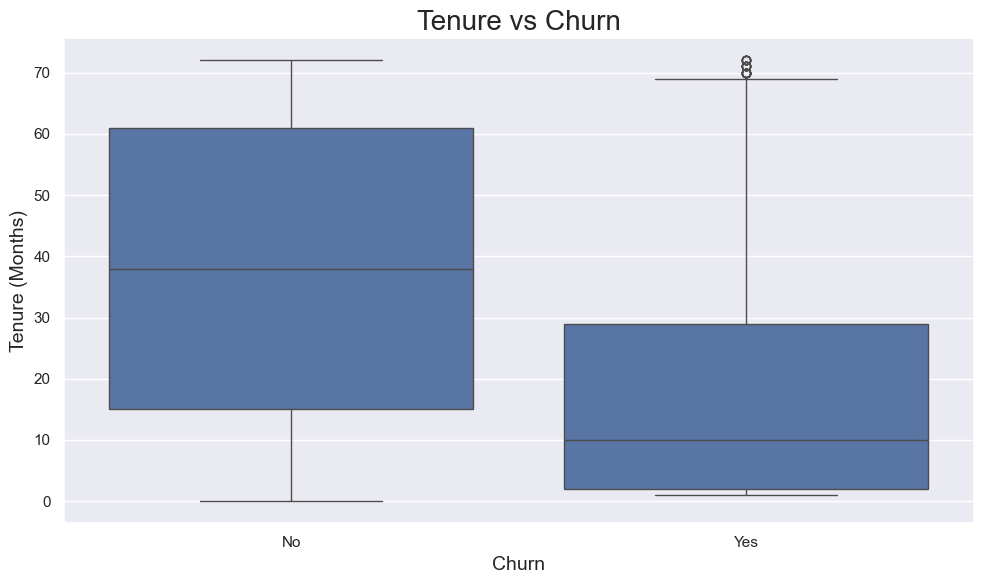

In [84]:
# Boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x='Churn', y='tenure')

plt.title('Tenure vs Churn', fontsize=20)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Tenure (Months)', fontsize=14)

plt.tight_layout()
plt.show()

*   Shorter Tenure, Higher Churn!

This suggests that newer customers are more likely to leave, possibly due to unmet expectations or dissatisfaction.

*   Longer Tenure, Lower Churn

Long-term customers may have developed loyalty or found value in the service.


## <font color='blue'>**Correlation Matrix**</font>

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.015683        0.219874      0.102411   
tenure               0.015683  1.000000        0.246862      0.825880   
MonthlyCharges       0.219874  0.246862        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn                0.150541 -0.354049        0.192858     -0.199484   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.354049  
MonthlyCharges  0.192858  
TotalCharges   -0.199484  
Churn           1.000000  


<Axes: >

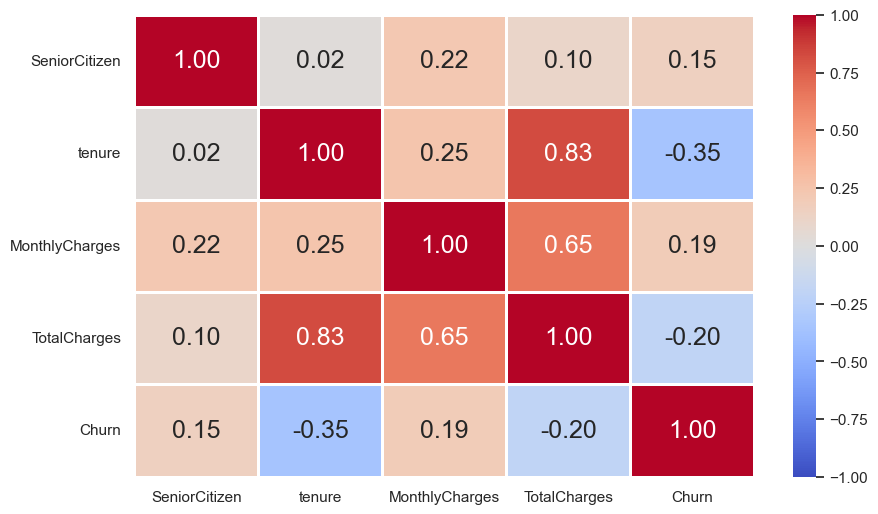

In [87]:
# Correlation Matrix
print(df_new2[numerical].corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 6))
sb.heatmap(df_new2[numerical].corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "coolwarm")

Based on the correlation matrix, we can observe:
* There is a weak correlation between most numerical features and target variable `Churn`.

* `tenure` and `TotalCharges` show a strong positive correlation (corr = 0.83), indicating that customers who have stayed longer tend to accumulate higher total charges.

* Senior citizens show a slight tendency to churn more than younger customers, as indicated by a weak positive correlation (corr = 0.15) between `SeniorCitizen` and `Churn`.

* Customers with higher monthly charges are somewhat more likely to churn compared to those with lower monthly charges (corr = 0.19)

* Long-term customers are less likely to churn compared to those with a shorter tenure (corr = -0.35)

* Total charges have a slight negative correlation (-0.20) with churn, suggesting that customers who have paid more over time tend to stay with the company.

# <font color='red'>**Categorical Features Analysis**</font>

Let us now explore our categorical features!

## <font color='blue'>**Unique Values**</font>
We first analyse the unique values in each categorical column to determine if any modifications are needed for better modeling.

In [91]:
# Find out the number of unique values in each categorical features
df_new2[categorical].nunique() #nunique: number of unique values

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

From the results,
*   None of the categorical columns have an extremely large number of unique values, indicating no high cardinality issues.
* No zero variance issues since all data contains at least two unique values.

Lets us now delve into the unique values of the categorical features.

In [94]:
# Getting unique values for each categoriacal features
for feature in df_new2[categorical]:
        print(f'{feature}: {df_new2[feature].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


*   We can see that **No internet service** under `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` is repeating several times in the features and in this this problem at hand, it gives the same meaning as **No**!

* Thus, we can categorise **No internet service** into **No** and the features will have only 2 unique values( Yes and No).



In [96]:
# Replace No internet service to No
df_new2[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df_new2[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')
# Replace No phone service to No
df_new2[['MultipleLines']]= df_new2[['MultipleLines']].replace('No phone service','No')

# Check for the unique values again after replace it
for feature in df_new2[categorical]:
        print(f'{feature}: {df_new2[feature].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## **<font color='blue'>Gender vs Churn</font>**

Churn           0          1
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


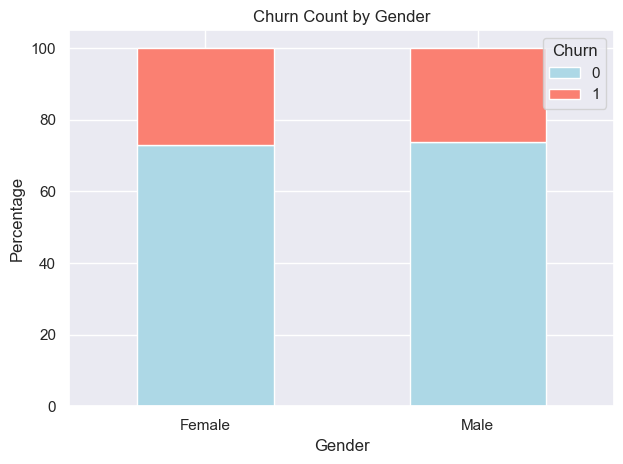

In [98]:
# Stacked Bar Plot
# Calculate the churn percentage for gender
gender_churn_percentage = df_new2.groupby('gender')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(gender_churn_percentage)

# Plot stacked bar plot using actual counts
#gender_churn_count = df_new2.groupby('gender')['Churn'].value_counts().unstack().fillna(0)
gender_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Churn Count by Gender')  # Title reflects actual counts now
plt.xlabel('Gender')
plt.ylabel('Percentage')  # Show actual counts on y-axis
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['0', '1'], loc='upper right')

plt.tight_layout()
plt.show()

* The probability of churn for females is 26.9%.
* The probability of churn for males is 26.2%.
* There is **not much difference** in the **churn rate between genders**.

## **<font color='blue'>Having Partner vs Churn</font>**

Churn            0          1
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


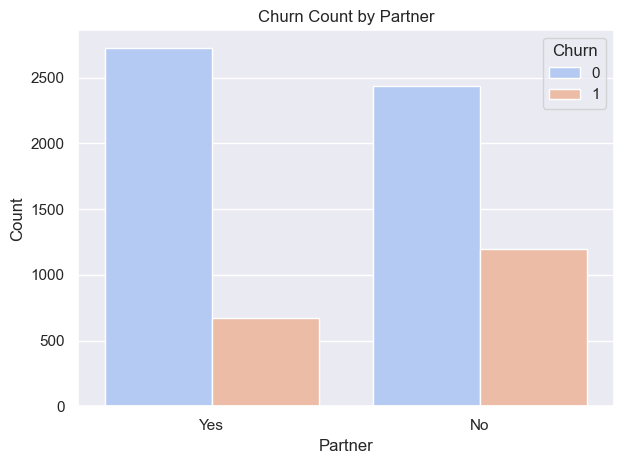

In [101]:
# Calculate the churn percentage for partners
partner_churn_percentage = df_new2.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(partner_churn_percentage)

# Plot stacked bar plot using actual counts
# partner_churn_count = df_new2.groupby('Partner')['Churn'].value_counts().unstack().fillna(0)
# partner_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
sb.countplot(data=df_new2, x='Partner', hue='Churn', palette='coolwarm')

plt.title('Churn Count by Partner')  # Title reflects actual counts now
plt.xlabel('Partner')
plt.ylabel('Count')  # Show actual counts on y-axis
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['0', '1'], loc='upper right')

plt.tight_layout()
plt.show()

* The probability of churn for customers with a partner is 19.71%.
* The probability of churn for customers without a partner is 32.97%.
* Customers **without a partner** are approximately **1.7 times *more likely to churn*** compared to those with a partner.

## **<font color='blue'>Having Dependent vs Churn</font>**

Churn               0          1
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


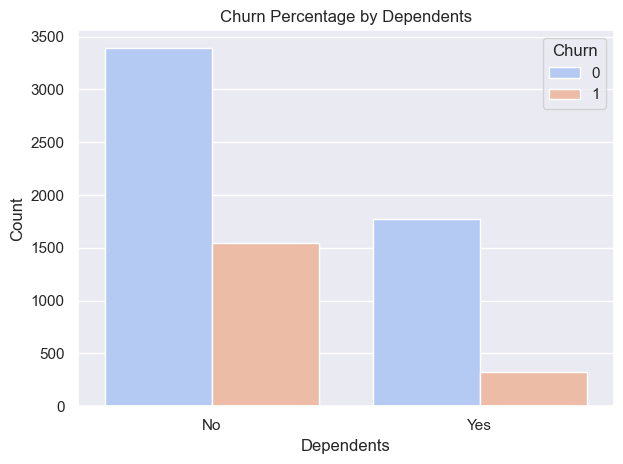

In [104]:
# Calculate the churn percentage for each dependent
dependent_churn_percentage = df_new2.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(dependent_churn_percentage)

# Plot stacked bar plot using actual counts
# dependent_churn_count = df_new2.groupby('Dependents')['Churn'].value_counts().unstack().fillna(0)
# dependent_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
sb.countplot(data=df_new2, x='Dependents', hue='Churn', palette='coolwarm')

plt.title('Churn Percentage by Dependents')  # Title reflects actual counts now
plt.xlabel('Dependents')
plt.ylabel('Count')  # Show actual counts on y-axis
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['0', '1'], loc='upper right')

plt.tight_layout()
plt.show()

* A customer with dependents has a probability of 15.5% churn.
* A customer without any dependents had a probability of 31.3% churn.
* Customer **without any dependents**, almost **2.03 times** ***more likely churn*** than customer with a dependent.




## **<font color='blue'>Contract Type vs Churn</font>**

Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


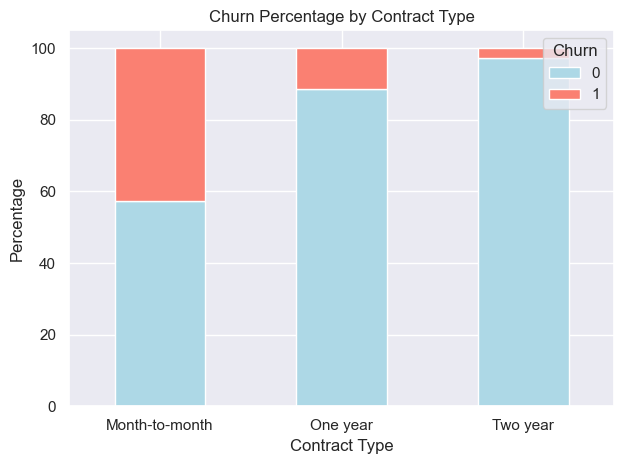

In [107]:
# Calculate Churn Percentage for each contract type
contract_churn_percentage = df_new2.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(contract_churn_percentage)

# Plotting percentage stacked bar plot
contract_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Churn Percentage by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['0', '1'], loc='upper right')

plt.tight_layout()
plt.show()

* Customers with **month-to-month contract** has a significantly ***higher likelihood of churning***, with a churn probability of 42.71%.
* Customers with one-year and two-year contracts are much less likely to churn, with probabilities of 11.28% and 2.85%, respectively.
* This trend suggests that longer-term contracts are associated with greater customer retention, likely due to the commitment involved and possibly better incentives offered for signing longer contracts. Therefore, encouraging customers to switch from month-to-month to longer-term contracts could be an effective strategy for reducing churn.

## **<font color='blue'>Services Distribution vs Churn</font>**

In [110]:
# Group all the services together
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']


Churn Percentage for PhoneService:
Churn                 0          1
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481

Churn Percentage for MultipleLines:
Churn                  0          1
MultipleLines                      
No             74.932349  25.067651
Yes            71.351534  28.648466

Churn Percentage for InternetService:
Churn                    0          1
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211

Churn Percentage for OnlineSecurity:
Churn                   0          1
OnlineSecurity                      
No              68.626669  31.373331
Yes             85.359801  14.640199

Churn Percentage for OnlineBackup:
Churn                0         1
OnlineBackup                    
No            70.78359  29.21641
Yes           78.43299  21.56701

Churn Percentage for DeviceProtection:
Churn               

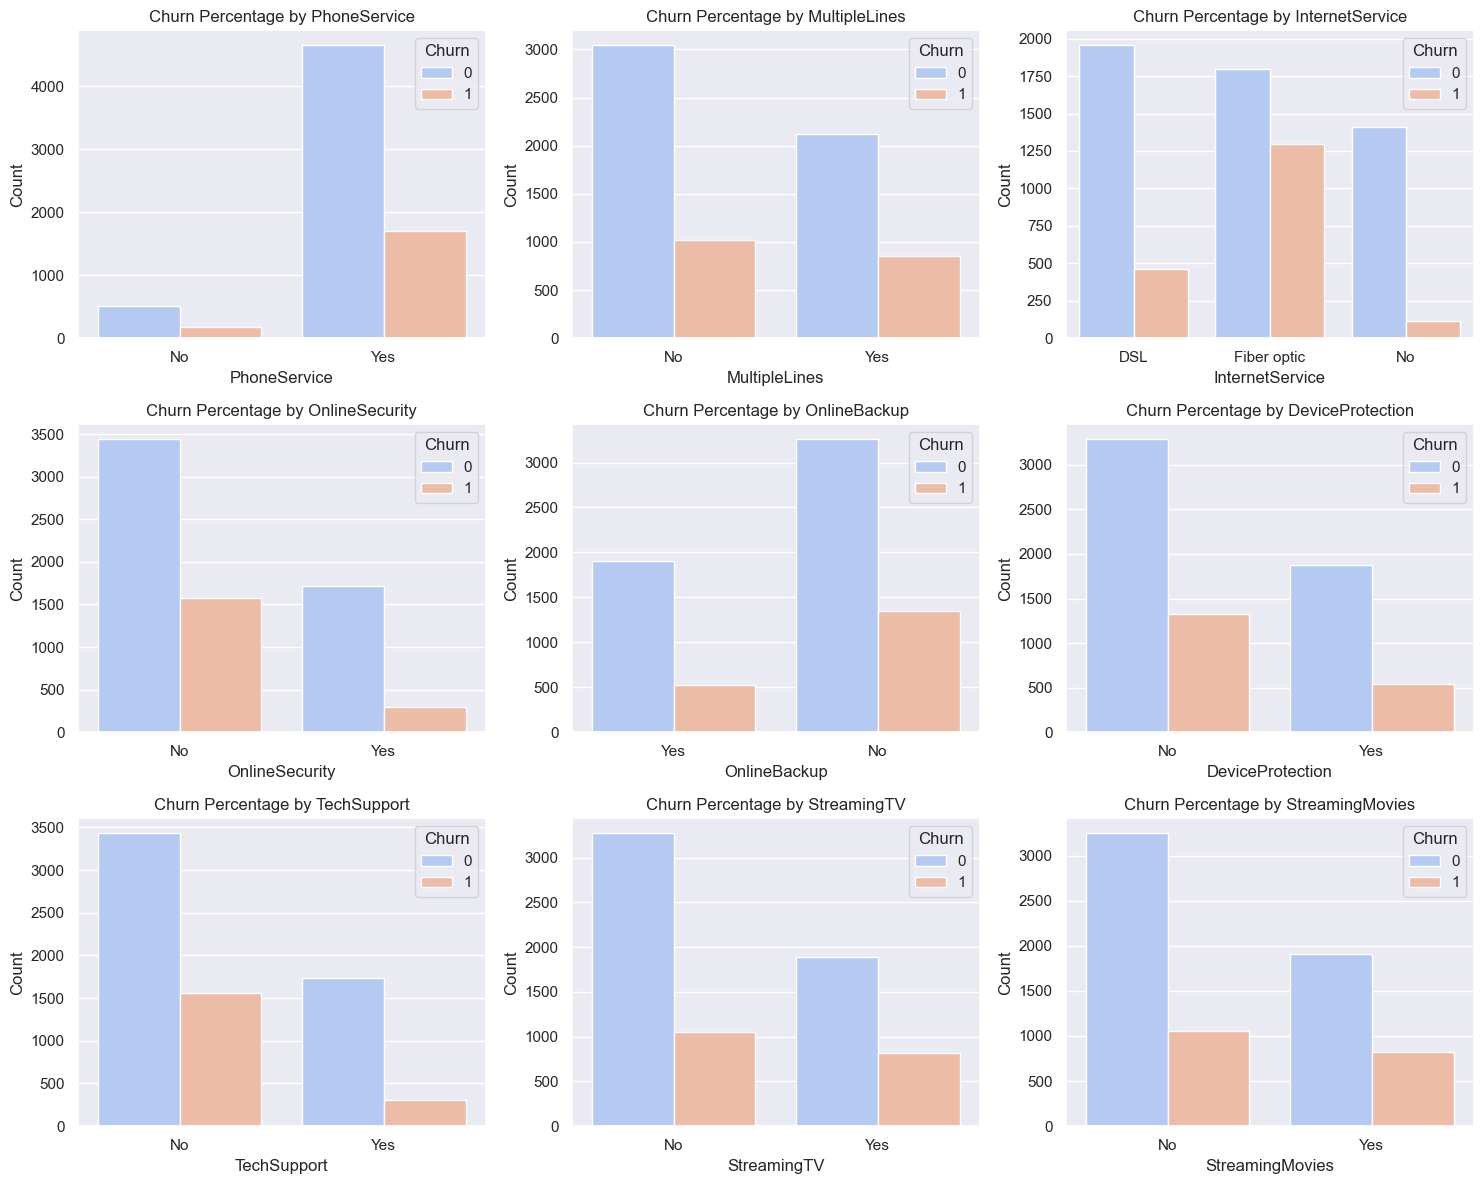

In [111]:
# Now, visualize churn percentage for each service
f, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for count, service in enumerate(services):
    # Calculate churn percentage for the given service
    churn_percentage = df_new2.groupby(service)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    print(f"\nChurn Percentage for {service}:")
    print(churn_percentage)

    # Plot stacked bar plot using percentages
    sb.countplot(data=df_new2, x=service, hue='Churn', palette='coolwarm', ax=axes[count])

    axes[count].set_title(f'Churn Percentage by {service}')
    axes[count].set_xlabel(service)
    axes[count].set_ylabel('Count')

plt.tight_layout()
plt.show()

**1. Phone Service**  
* A customer with a phone service has a probability of 26.7% churn.
* A customer without any phone service has a probability of 25.0% churn.
* There is **not much difference** in churn rate between customer who has a phone service with the company and customer who does not have.

**2. Multiple Lines**  
* A customer with a multiple lines service has a probability of 28.64 % churn.
* A customer without multiple lines service has a probability of 25.07 % churn.
* There is **not much difference** in churn rate between customer who has a multiple lines phone service with the company and customer who does not have.

**3. Internet Service**  
* A customer with a Fiber Optic internet service has a probability of 41.89 % churn
* A customer with a DSL internet service has a probability of 18.96 % churn
* A customer without any internet service has a probability of 7.4 % churn

This data leads to several conclusions:

* Fiber Optic customers are 5.66 times more likely to churn than those with no internet, suggesting potential issues like high costs, unreliable service, or poor customer experience.

* Fiber Optic users are nearly 2.21 times more likely to churn than DSL customers, indicating that DSL may offer better stability or affordability.

* DSL customers are 2.56 times more likely to churn than those without internet service.

Possible reasons for high Fiber Optic churn include:

1. Higher costs driving customers to seek alternatives.

2. Technical issues or slow customer support.

3. Limited perceived benefits over cheaper DSL plans.

4. Better competitor offers.

To improve retention, the telco company should focus on enhancing their Fiber Optic service, offer promotions to attract DSL users and encourage customers without internet to subscribe with special offers.

**4. Online Security**  
* A customer with a online security service has a probability of 14.6% churn.
* A customer without any online security service has a probability of 31.4% churn.
* A customer **with an online security service** with the company almost **2.15 times** **less likely to leave ** the company than a customer without any online security service with the company.

**5. Online Backup**  
* A customer with a online backup service has a probability of 21.6% churn.
* A customer without any online backup service has a probability of 29.2% churn.
* A customer **with an online backup service** with the company almost **1.35 times** **less likely to leave ** the company than a customer without any online backup service with the company.

**6. Device Protection**  
* A customer with a device protection service has a probability of 22.5% churn.
* A customer without any device protection service has a probability of 28.7% churn.
* A customer **with device protection service** with the company almost **1.27 times** **less likely to leave ** the company than a customer without any device protection service with the company.  

**7. Tech Support**  
* A customer with a tech support service has a probability of 15.2% churn.
* A customer without any tech support service has a probability of 31.2% churn.
* A customer **with tech support service** with the company almost **2.05 times** **less likely to leave ** the company than a customer without any tech support service with the company.  

**8. Streaming TV**  
* A customer with a streaming TV service has a probability of 30.1% churn.
* A customer without any streaming TV service has a probability of 24.4% churn.
* A customer **with streaming TV service** with the company almost **1.23 times** **more likely to leave ** the company than a customer without any streaming TV service with the company.  

**9. Streaming Movies**  
* A customer with a streaming Movies service has a probability of 30.0% churn.
* A customer without any streaming Movies service has a probability of 24.4% churn.
* A customer **with streaming Movies service** with the company almost **1.23 times** **more likely to leave ** the company than a customer without any streaming TV service with the company.  

## **<font color='blue'>Paperless Billing vs Churn</font>**

Churn                     0          1
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


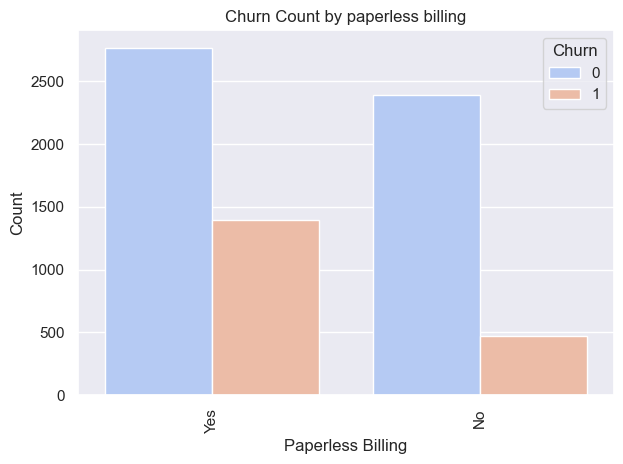

In [114]:
# Calculate the churn percentage for paperless billing
paperlessBilling_churn_percentage = df_new2.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(paperlessBilling_churn_percentage)

# Plot stacked bar plot using actual counts
#paperlessBilling_churn_count = df_new2.groupby('PaperlessBilling')['Churn'].value_counts().unstack().fillna(0)
# paperlessBilling_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
sb.countplot(data=df_new2, x='PaperlessBilling', hue='Churn', palette='coolwarm')

plt.title('Churn Count by paperless billing')  # Title reflects actual counts now
plt.xlabel('Paperless Billing')
plt.ylabel('Count')  # Show actual counts on y-axis
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['0', '1'], loc='upper right')

plt.tight_layout()
plt.show()

* A customer with a Paperless billing has a probability of 33.59% churn.
* A customer without a Paperless billing has a probability of 16.38% churn.
* A customer **with a paperless billing** with the company **almost 2.06 times *more likely to leave*** the company than a customer without a paperless billing with the company.




## **<font color='blue'>Payment Method vs Churn</font>**

Churn                              0          1
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


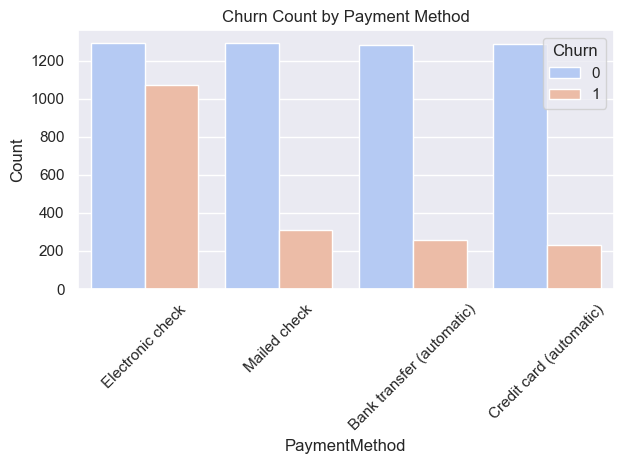

In [117]:
# Calculate the churn percentage for payment method
paymentMethod_churn_percentage = df_new2.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(paymentMethod_churn_percentage)

# Plot stacked bar plot using actual counts
#paymentMethod_churn_count = df_new2.groupby('PaymentMethod')['Churn'].value_counts().unstack().fillna(0)
# paymentMethod_churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
sb.countplot(data=df_new2, x='PaymentMethod', hue='Churn', palette='coolwarm')

plt.title('Churn Count by Payment Method')  # Title reflects actual counts now
plt.xlabel('PaymentMethod')
plt.ylabel('Count')  # Show actual counts on y-axis
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['0', '1'], loc='upper right')

plt.tight_layout()
plt.show()

* A customer with a Payment Method as a Bank Transfer has a probability of 16.73% churn.
* A customer with a Payment Method as a Credit Card (Automatic) has a probability of 15.25% churn.
*   A customer with a Payment method as a Electronic Check has a probability of 45.29% churn.
*   A customer with a Payment Method as a Mailed Check has a probability of 19.20% churn.
* Almost **half of the customers** with a payment method as a **Electronic Check churn**, which is a quite big percentage!
We suspect that it is due to clunky portals, login fatigue, or lack of payment reminders that increases frustration among customers.

A Study showed that a utility company is able to reduce e-billing churn by 25% after adding:
-One-click payment links in emails
-Auto-login for returning users
Source: J.D. Power Utility Digital Satisfaction Study

# <font color='red'>**Overall Insight**</font>

<u>**Categorical Features**</u>.

*   **Gender:** Since there is not much difference between gender on churn rate, thus we won't include gender into our model and <u>*may considering remove it in a later part (feature importance)*</u>.

*   **Partner:** Customer without any relationship, single customer almost 1.7 times more likely churn than customer with a partner.

* **Dependents:** Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.

* **Phone Service:** Since churn rate difference between customer has a phone service with the company and customer does not have a home phone service is VERY SMALL, thus we won't include phone service into our model and <u>*may consider removing it in a later part (feature importance)*</u>.

* **Multiple Lines:** Since churn rate difference between customer has a multiple lines phone service with the company and customer does not have is VERY SMALL, thus we won't include phone service into our model and <u>*may considering removing it in a later part (feature importance)*</u>.

* **Internet Service:** Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.

* **Online Security:** A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.

* **Online Backup:** A customer with an online backup service with the company almost 1.35 times less likely to leave the company than a customer without any online backup service with the company.

* **Device Protection:** A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.

* **Tech Support:** A customer with a Tech Support service with the company almost 2.06 times less likely to leave the company than a customer without any a Tech Support service with the company.

* **Streaming TV Service:** A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.

* **Streaming Movies Service:** A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.

* **Contract Type:** Great differences based on the contract were seen in the histogram and mean differences.
  * Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.
  * On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.

* **Paperless Billing:** A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.

* **Payment Method:** Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.

> Recommedation for company:
- Identify categories with higher churn and offer retention strategies like discounts, loyalty programs.
- Encourage customers to switch to lower-churn categories (long-term contract) through incentives.
- Asking feedback to understand reasons behind high churn and address their concerns effectively.




---
# <font color='blue'>**5. ML Model Training**</font>


In [122]:
# Create a new copy and use it for our Feature Engineering
df_fe = df_new2.copy()

# **<font color='blue'>Feature Engineering</font>**

In this section, we will perform the following variable engineering operations which consists of

**1.Missing Values Detection**

**2.Outlier Detection (Outliers)**

**3.Label Encoding**

## **1. Missing Values Detection**

In the previous part, we deleted all the missing values. Here, we will double-check to confirm that there are no remaining missing values.

In [127]:
df_fe.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
MonthlyCharges_bins    0
dtype: int64

##**2. Outlier Analysis**
* Detect any outliers by using `threshold` function   
* Cleans the outliers by capping them at the threshold values
  * Any value below `low_limit` is replaced with `low_limit`
  * Any value above `up_limit` is replaced with `up_limit`
* Default thresholds use q1 = 0.05, q3 = 0.95

In [129]:
# Function to calculate outlier thresholds (upper & lower bounds)
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Function to check if outliers exist
def check_outlier(dataframe, col_name, plot=False):
    if dataframe[col_name].isnull().all():
        return False  # Skip empty columns

    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]

    if not outliers.empty:
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    return False

# Function to replace outliers with thresholds
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe[variable] = np.where(dataframe[variable] < low_limit, low_limit, dataframe[variable])
    dataframe[variable] = np.where(dataframe[variable] > up_limit, up_limit, dataframe[variable])

# Identify only numerical columns (excluding categorical ones)
num_cols = df_fe.select_dtypes(include=['number']).columns.tolist()

# Dictionary to store outlier counts
outlier_summary = {}

# Process each numerical column
for col in num_cols:
    has_outliers = check_outlier(df_fe, col)
    outlier_summary[col] = has_outliers
    print(col, check_outlier(df_fe, col))
    if has_outliers:
        replace_with_thresholds(df_fe, col)

# Print summary of detected outliers
outlier_counts = sum(outlier_summary.values())
print(f"Outlier check completed. {outlier_counts} column(s) contained outliers and were adjusted.")


SeniorCitizen False
tenure False
MonthlyCharges False
TotalCharges False
Churn False
Outlier check completed. 0 column(s) contained outliers and were adjusted.


In skewed or non-normal distributions, extreme values may be more common. Using 5% and 95% ignores extreme tails while still capturing the majority of the data.
It can be concluded that here are no extreme outliers.

## **3. Label Encoding of Categorical Features**
* Encodes the categorialcal columns that existed to make the dataset more ML-friendly (numerical) as ML models cannot work with categorical data directly - they can only understand numerical values.

In [132]:
df_fe.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup  ... TechSupport  \
0            No             DSL             No          Yes  ...          No   
1            No             DSL            Yes           No  ...          No   
2            No             DSL            Yes          Yes  ...          No   
3            No             DSL            Yes           No  ...         Yes   
4            No     Fiber optic             No           No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  \
0           Electronic check          29.85         29.85      0   
1               Mailed check          56.95       1889.50      0   
2               Mailed check          53.85        108.15      1   
3  Bank transfer (automatic)          42.30       1840.75      0   
4           Electronic check          70.70        151.65      1   

   MonthlyCharges_bins  
0                  Low  
1                  Mid  
2                  Mid  
3                  Mid  
4                 High  

[5 rows x 21 columns]

In [133]:
# Convert MonthlyCharges_bins from categorical to numeric string
df_fe['MonthlyCharges_bins'] = df_fe['MonthlyCharges_bins'].astype(str).replace({'Low': 0, 'Mid': 1, 'High': 2})

C:\Users\eilee\AppData\Local\Temp\ipykernel_17908\2955827301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fe['MonthlyCharges_bins'] = df_fe['MonthlyCharges_bins'].astype(str).replace({'Low': 0, 'Mid': 1, 'High': 2})


In [134]:
# Find out all the categorical Columns
categorical = df_fe.select_dtypes('object').columns

print("Categorical Columns:")
print(df_fe[categorical].columns)

Categorical Columns:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [135]:
le=LabelEncoder()
for col in categorical:
    df_fe[col]=le.fit_transform(df_fe[col])

df_fe.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             1  ...   
1              0                0               1             0  ...   
2              0                0               1             1  ...   
3              0                0               1             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            1            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  MonthlyCharges_bins  
0              2           29.85         29.85      0                    0  
1              3           56.95       1889.50      0                    1  
2              3           53.85        108.15      1                    1  
3              0           42.30       1840.75      0                    1  
4              2           70.70        151.65      1                    2  

[5 rows x 21 columns]

# **<font color='blue'>Training & Test Data Split</font>**

In [137]:
# Create a new copy from data after finish feature engineering and use it for our ML training
df_ml= df_fe.copy()
df_ml.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             1  ...   
1              0                0               1             0  ...   
2              0                0               1             1  ...   
3              0                0               1             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            1            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  MonthlyCharges_bins  
0              2           29.85         29.85      0                    0  
1              3           56.95       1889.50      0                    1  
2              3           53.85        108.15      1                    1  
3              0           42.30       1840.75      0                    1  
4              2           70.70        151.65      1                    2  

[5 rows x 21 columns]

# **1. Drop Target Variable**
💡**Why?**  
* It is what our model is trying to predict.
* If we include it, our model could "cheat" by learning from the label itself and leads to unrealistically high accuracy during training.

In [139]:
# Splitting the features and target
X = df_ml.drop(columns=["Churn"])
y = df_ml["Churn"]

# **2. Splitting Data into Train & Test**
💡**Why?**  
* To prevent overfitting
* Train set (70%) -> train model
* Test set (30%) -> evaluate the model on unseen data

In [141]:
from sklearn.model_selection import train_test_split

#Splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

X_train shape: (4922, 20) | y_train shape: (4922,)
X_test shape: (2110, 20) | y_test shape: (2110,)


🔍**Observation**
*   for X train and test each with 4922 and 2110 samples, with 20 features respectively
* for y train and test each with 4922 and 2110 labels, just 1 value per sample as it is to store the true class (churn or not) for each test sample.



# **3. SMOTE (for imbalanced data)**
💡**Why?**  
* Previously, we found out that our data is imbalance which can make the model biased as they tend to predict the majority class more often, ignoring minority.
* By using SMOTE (Synthetic Minority Over-sampling Technique), it generates new synthetic examples along the lines between real ones.
* We will then get a <u>balanced dataset without information loss or overfitting risks</u>.
* SMOTE can only apply to train data after splitting to prevent data leakage

In [144]:
from imblearn.over_sampling import SMOTE

# Handeling Imbalanced Using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## **4. Scaling/Standardising after Splitting**
* After splitting the dataset into training and test sets, and optionally applying SMOTE to handle class imbalance, the numerical features are standardised using StandardScaler.
* Standardises features by removing the mean and scaling to unit variance  
* (z = (x - mean) / std)

💡**Why?**  
* Models like Logistic Regression, SVC, KNN...etc often work better when input features are on a similar scale.

In [146]:
from sklearn.preprocessing import StandardScaler

#Feature Scalling
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
# Data before SMOTE
print(y_train.value_counts())

Churn
0    3614
1    1308
Name: count, dtype: int64


In [148]:
# Checking the data after SMOTE
print(y_train_smote.value_counts())

Churn
1    3614
0    3614
Name: count, dtype: int64


🔍**Observation**
*   From the above train counts, we can clearly see that after applying SMOTE, our data become balanced! roughly equal number of churn (1) and no-churn (0) samples.


# **<font color='blue'>Train with Imbalanced Data [Binary Classification (Churn vs No Churn)]</font>**

We will perform individual models -> ensemble learning techniques -> advanced ensemble boosting model

💡**Why?**  
* Individual models: **Decision Trees, K-Nearest Neighbours (KNN), Logistic Regression, Support Vector Classfier (SVC)** each have their own characteristics and advantages for us  to understand our data better and benchmark simple performance.

* Ensemble techniques: **Random Forest Classifier, AdaBoost** combine multiple weak learners (usually decision trees) to form a stronger model. These helps with better generalisation, reduced overfitting, improved accuracy compared to single models and greater robustness to imbalance.

* Advanced ensemble boosting model: **XGBoost Classifier**, a highly optimised and scalable boosting model, including regularisation to prevent overfitting, efficient on large imbalanced datasets and provides feature importance insight.

## **Individual Models**

## **1. Decision Tree Classifier (Imbalanced)**
💡**Why?**  
* Non linear model used for classification and regression tasks
* Works well for non-linear relationships and handle both categorical and numerical data
*Fast to train
* It will recursively splits the data into smaller subsets based on feature values to create a tree structure.
* But can overfit easily especially if the tree is too deep, which is where ensemble mthods like Random Forest can help

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7974400650142218

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7682464454976303

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1549
           1       0.56      0.61      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.78      0.77      0.77      2110



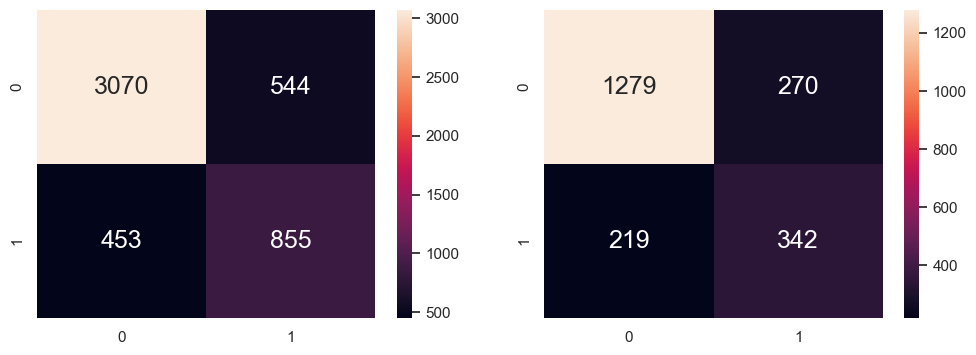

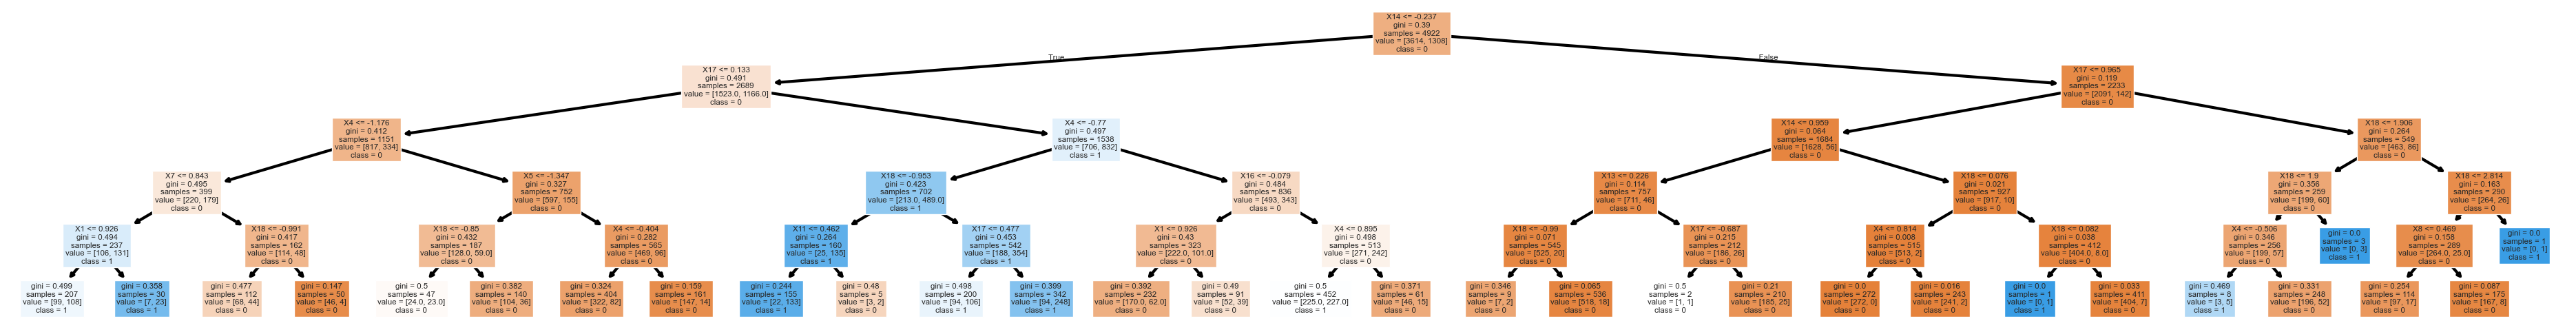

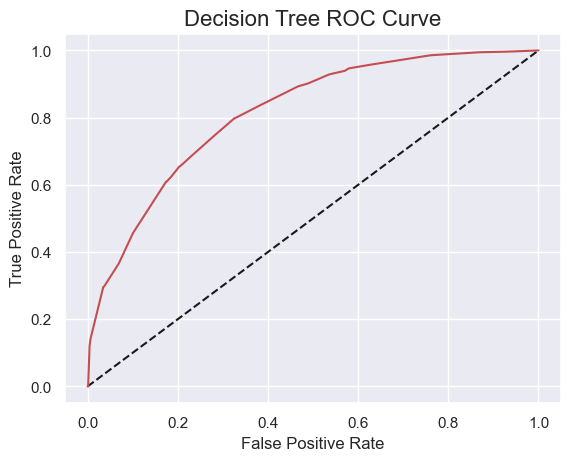

ROC AUC: 0.8133


In [154]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
accuracy_dt = dectree.score(X_test, y_test)

# Report
report = classification_report(y_test, y_test_pred)
print(report)


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree,
          feature_names=[f'X{i}' for i in range(X_train.shape[1])],
          class_names=[str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

# ROC Curve
y_pred_prob = dectree.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc_dt:.4f}")

🔍**Observation**
*   Decision Tree performs relatively well in predicting Class 0, but it has a lower precision and recall for Class 1.


## **2. KNN (K-Nearest Neighbours) (Imbalanced)**
💡**Why?**  
* Non-parametric algorithm doesnt make any assumptions about the underlying data distribution
* Stores all data points and classifies a new data point based on its proximity to other points (Euclidean distance metric etc)
* Simple, easy to understand
* But, doesnt scale well with high-dimensional data and large datasets as it calculates distances between every point

KNN accuracy is: 0.7639810426540284

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.53      0.54       561

    accuracy                           0.76      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



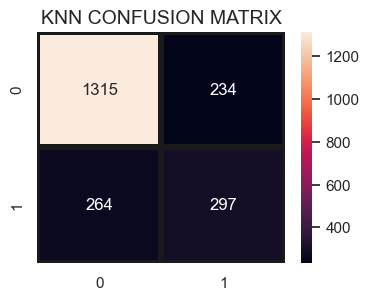

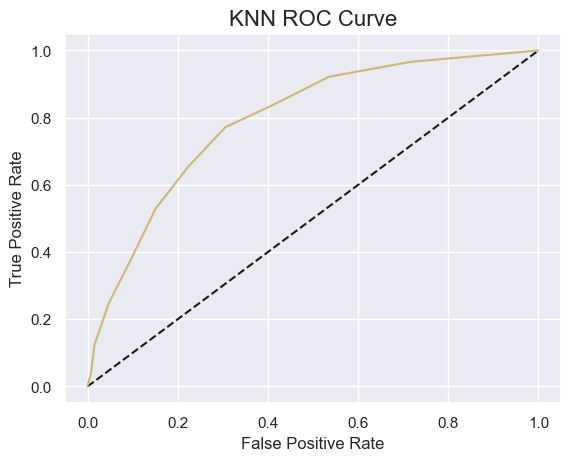

ROC AUC: 0.7922


In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=11)  # Adjust 'n_neighbors' as needed
knn_model.fit(X_train, y_train)  # Fit using scaled data

# Evaluate accuracy
accuracy_knn = knn_model.score(X_test, y_test)  # Test on scaled data
print("KNN accuracy is:", accuracy_knn)
print()

# Print classification report
knn_pred = knn_model.predict(X_test)
report = classification_report(y_test, knn_pred)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("KNN CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Line for random guessing
plt.plot(fpr, tpr, color="y")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc_knn:.4f}")

🔍**Observation**
*   KNN shows an improvement in accuracy compared to Decision Tree, with a stronger performance in Class 0. Class 1 still suffers with lower precision and recall.


## **3. Logistic Regression (Imbalanced)**
Predicts probabilities for categorical outcomes

💡**Why?**  
* Linear model used for classification problems
* Models the probability of class using logistic function and find the best-fit line that separates the data into different classes
* Simple, interpretable, fast to train and works well when there is a linear relationship between features and target variables
* But might struggle with complex, non-linear relationships

Logistic Regression accuracy is: 0.795734597156398

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



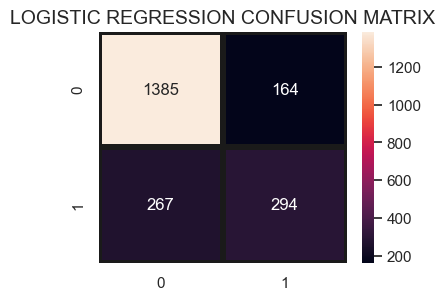

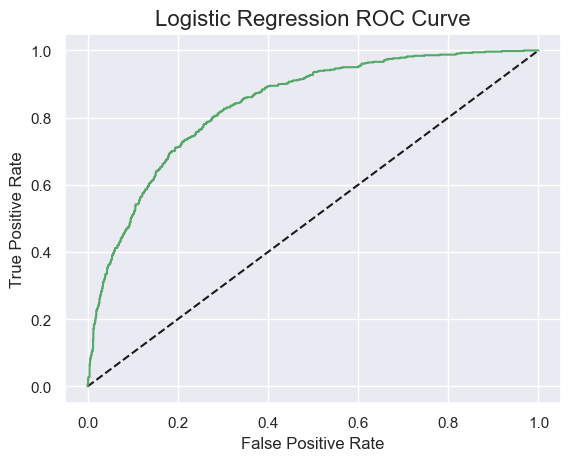

ROC AUC: 0.8376


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Assuming X_train and X_test are scaled (StandardScaler) and y_train and y_test are properly formatted.
# Train Logistic Regression with more iterations
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)  # Fit the model on the training data

# Evaluate the model
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy is:", accuracy_lr)
print()

# Predictions
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Line for random guessing
plt.plot(fpr, tpr, label='Logistic Regression', color="g")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc_lr:.4f}")

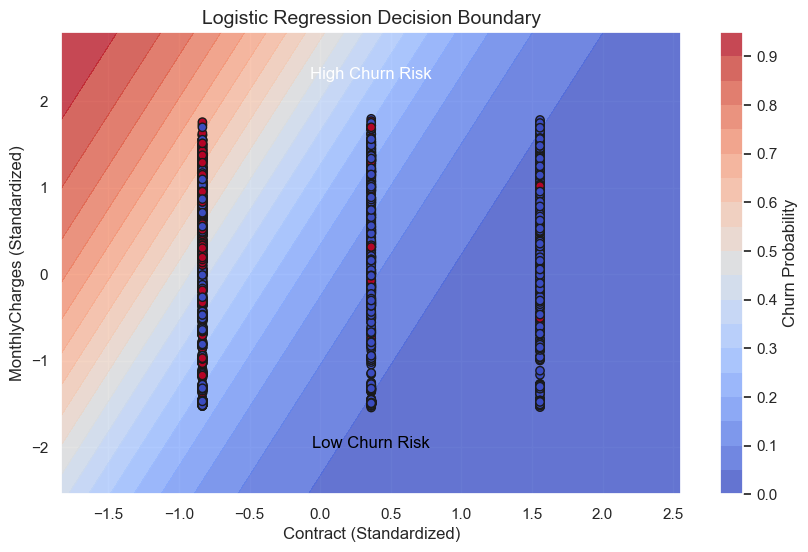

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Get feature names BEFORE scaling
feature_names = df_ml.drop(columns=["Churn"]).columns

# Select top 2 features to visualize
top_features = ['Contract', 'MonthlyCharges']

# Find their column indices
col_indices = [np.where(feature_names == f)[0][0] for f in top_features]

# Extract these features from scaled data
X_2d = X_train[:, col_indices]

# Train simplified model
lr_2d = LogisticRegression(max_iter=1000)
lr_2d.fit(X_2d, y_train)

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict probabilities
Z = lr_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Churn Probability')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train,
            edgecolors='k', cmap='coolwarm')
plt.xlabel(top_features[0] + " (Standardized)")
plt.ylabel(top_features[1] + " (Standardized)")
plt.title("Logistic Regression Decision Boundary", fontsize=14)

# Add interpretation
plt.text(0.5, 0.9, "High Churn Risk", ha='center',
         transform=plt.gca().transAxes, color='white')
plt.text(0.5, 0.1, "Low Churn Risk", ha='center',
         transform=plt.gca().transAxes, color='black')
plt.show()

🔍**Observation**
*   Logistic Regression performs significantly better in terms of overall accuracy, with better precision for Class 1 compared to other models. However, it still has a lower recall for Class 1.  

🔴 Red areas: High churn probability (>70%)  
🔴 Red dots: Actual customers who churned

🔵 Blue areas: Low churn probability (<30%)  
🔵 Blue dots: Actual customers who stayed


## **4. SVC (Support Vector Classifier) (Imbalanced)**
Part of Support Vector Machines (SVM)

💡**Why?**  
* Non-linear model that tries to find the hyperplane that best seperates data points from different classes
* Works well when the data is complex or not linearly separable
* Can handle high-dimensional data (our data involves numerous features e.g. demographics, services..)
* Can handle class-imbalance issues

SVC accuracy is: 0.795734597156398

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



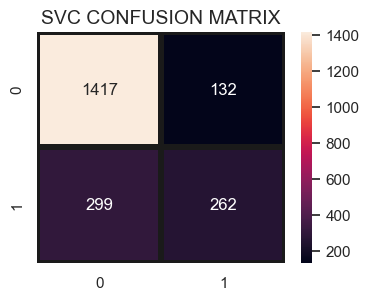

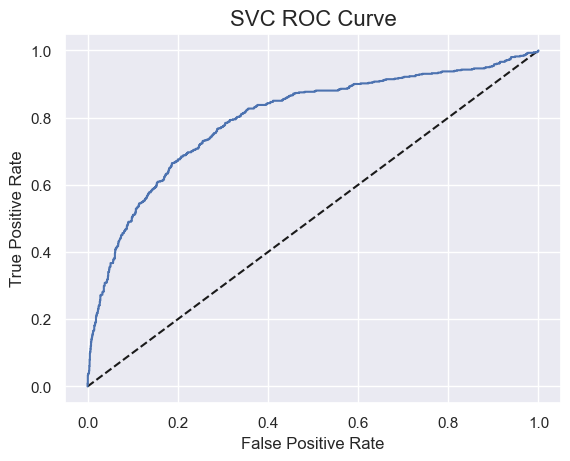

ROC AUC: 0.7970


In [164]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Ensure X_train and X_test are scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVC model with a radial basis function (RBF) kernel
svc_model = SVC(kernel='rbf', random_state=42, probability=True)  # Use the RBF kernel (Radial Basis Function kernel (also called Gaussian kernel)) and enable probability estimates
svc_model.fit(X_train_scaled, y_train.values.ravel())  # Fit the model with training data

# Evaluate the model
accuracy_svc = svc_model.score(X_test_scaled, y_test.values.ravel())
print("SVC accuracy is:", accuracy_svc)
print()

# Predictions
svc_pred = svc_model.predict(X_test_scaled)
report = classification_report(y_test.values.ravel(), svc_pred)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), svc_pred),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVC CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob = svc_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr, tpr, label='SVC', color="b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_svc = roc_auc_score(y_test.values.ravel(), y_pred_prob)
print(f"ROC AUC: {roc_auc_svc:.4f}")

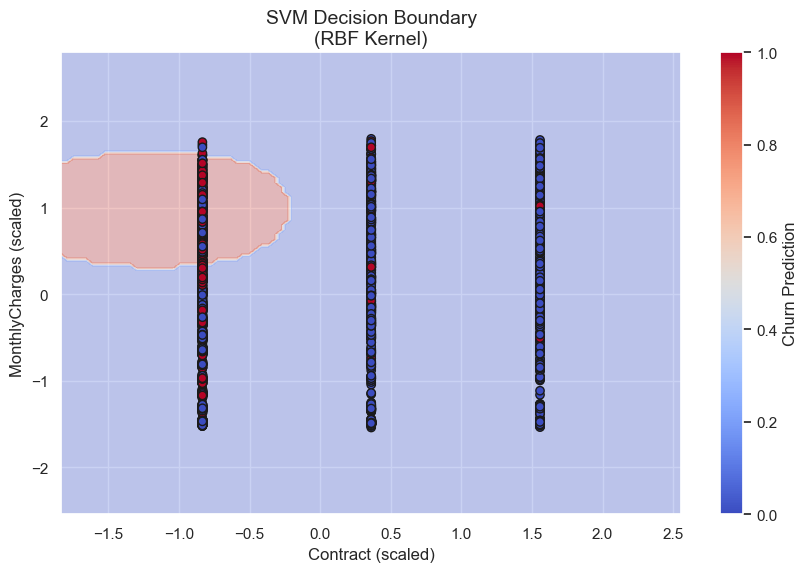

In [165]:
# Two most important features
top_features = ['Contract', 'MonthlyCharges']
X_2d = X_train_scaled[:, [list(feature_names).index(f) for f in top_features]]

# Train simplified SVC
svc_2d = SVC(kernel='rbf', probability=True)
svc_2d.fit(X_2d, y_train.values.ravel())

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel(f"{top_features[0]} (scaled)")
plt.ylabel(f"{top_features[1]} (scaled)")
plt.title("SVM Decision Boundary\n(RBF Kernel)", fontsize=14)
plt.colorbar(label="Churn Prediction")
plt.show()

🔍**Observation**
*   SVC gives the highest accuracy (79%), but struggles with recall for Class 1. It performs well with Class 0 but misses more Class 1 cases compared to other models.  

🔵 Blue region: Predicted "Will NOT Churn"  
🔵 Blue circles: Actual customers who stayed  

🔴 Red region: Predicted "Will Churn"  
🔴 Red circles: Actual customers who left

The plot reveals how two key features (contract + monthly charges) interact to drive churn

High monthly charges + short contract = solid red (certain churn)


## **Ensemble Learning Techniques**

## **1. Random Forest Classifier (Imbalanced)**
Ensemble of decision trees trained on random subsets of the data. It Combines multiple decision trees to make the final prediction by voting (classification).

💡**Why?**  
* Handles Complex data (non-linear) which is common in customer data
* Reduces overfitting uses multiple decisions trees and averages their predictions
* Feature Importance allowing us to understand which factors are contributing most to customer churn
* It can performs well even if some data points have missing values bold text

Random Forest accuracy is: 0.7824644549763033

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



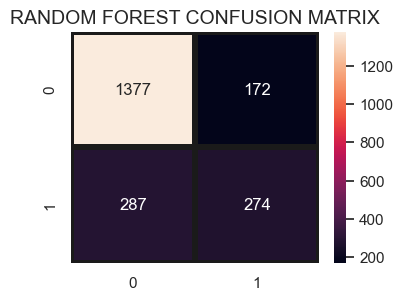

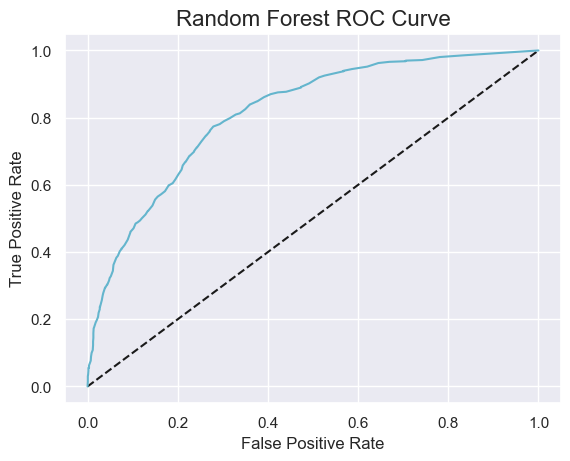

ROC AUC: 0.8136


In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Ensure X_train and X_test are scaled (optional for RandomForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest with more estimators
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees as an example
rf_model.fit(X_train_scaled, y_train.values.ravel())  # Fit the model with training data

# Evaluate the model
accuracy_rf = rf_model.score(X_test_scaled, y_test.values.ravel())
print("Random Forest accuracy is:", accuracy_rf)
print()

# Predictions
rf_pred = rf_model.predict(X_test_scaled)
report = classification_report(y_test.values.ravel(), rf_pred)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), rf_pred),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr, tpr, label='Random Forest', color="c")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test.values.ravel(), y_pred_prob)
print(f"ROC AUC: {roc_auc_rf:.4f}")

🔍**Observation**
*   Random Forest also performs well overall with a strong precision for Class 0 but a lower recall for Class 1. Similar to SVC, it struggles to capture enough Class 1 cases.

## **2. AdaBoost (Adaptive Boosting) (Imbalanced)**
Ensemble machine learning algorithm that combines multiple "weak" learners to create a strong and accurate pre-dictive model

💡**Why?**  
* Handle imbalanced data well as it focuses more on hard-to-classify churn cases, making it usefuk when churned customers are a minority
* Improves overall prediction by combining multiple weak learners
* Helps avoid overfitting and underfitting

AdaBoost accuracy is: 0.7924170616113744

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



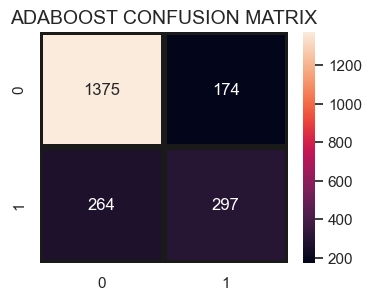

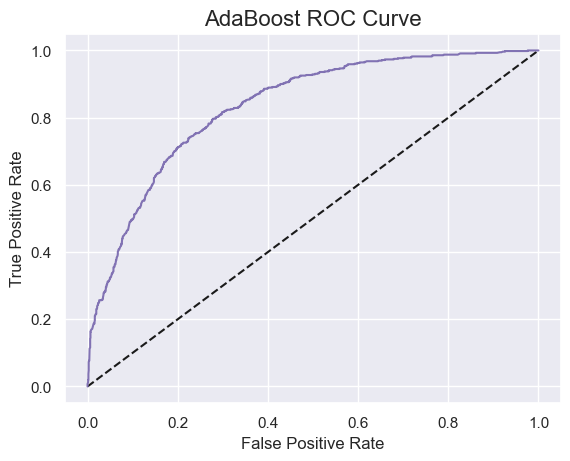

ROC AUC: 0.8343


In [172]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Train AdaBoost with DecisionTree as the base estimator
ab_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
ab_model.fit(X_train, y_train.values.ravel())  # Train on unscaled data or scaled as needed

# Evaluate the model
accuracy_ab = ab_model.score(X_test, y_test.values.ravel())
print("AdaBoost accuracy is:", accuracy_ab)
print()

# Predictions
ab_pred = ab_model.predict(X_test)
report = classification_report(y_test.values.ravel(), ab_pred)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), ab_pred),
           annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("ADABOOST CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob = ab_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr, tpr, label='AdaBoost', color="m")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_ab = roc_auc_score(y_test.values.ravel(), y_pred_prob)
print(f"ROC AUC: {roc_auc_ab:.4f}")

🔍**Observation**
*   AdaBoost has similar performance to Random Forest and SVC in terms of accuracy, with a slightly higher precision for Class 1. However, it also struggles with recall for Class 1.

🔍**Summary: Training without SMOTE**

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-score (Class 1)** |
|------------------------|--------------|-------------------------|----------------------|------------------------|-------------------------|----------------------|------------------------|
| **Decision Tree**       | 0.72         | 0.81                    | 0.80                 | 0.81                   | 0.47                    | 0.49                 | 0.48                   |
| **KNN**                | 0.78         | 0.81                    | 0.91                 | 0.86                   | 0.64                    | 0.42                 | 0.50                   |
| **Logistic Regression** | 0.79         | 0.83                    | 0.90                 | 0.86                   | 0.63                    | 0.49                 | 0.55                   |
| **SVC**                 | 0.79         | 0.82                    | 0.91                 | 0.86                   | 0.65                    | 0.45                 | 0.53                   |
| **Random Forest**       | 0.78         | 0.82                    | 0.90                 | 0.86                   | 0.63                    | 0.47                 | 0.54                   |
| **AdaBoost**            | 0.78         | 0.82                    | 0.89                 | 0.85                   | 0.60                    | 0.45                 | 0.52                   |

**All models show a performance drop in predicting Class 1 (the minority class)!**
* **Class Imbalance**:  This is typical of imbalanced datasets where the model is more inclined to predict the majority class (Class 0), which results in lower recall for Class 1.

* **Precision vs Recall**: Precision and recall are often inversely related. Most models show good precision for Class 0, but precision for Class 1 tends to be lower. Recall for Class 1 is consistently low across all models, indicating that the models are failing to capture a sufficient number of Class 1 instances.

(Macro and Weighted Avg not so close = imbalance!)
- Macro = simple avg across all classes. Each class contributes equally, regardless of how many samples it has.
- Weighted = avg that gives more weight to classes with more samples

# **<font color='blue'>Train with SMOTE Data</font>**
Since Class 1 is underrepresented, applying techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the dataset and improve recall for Class 1.

## **Individual Models**

## **1. Decision Tree Classifier (SMOTE Balanced)**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8166851134477033

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7146919431279621

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1549
           1       0.48      0.75      0.58       561

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.68      2110
weighted avg       0.78      0.71      0.73      2110



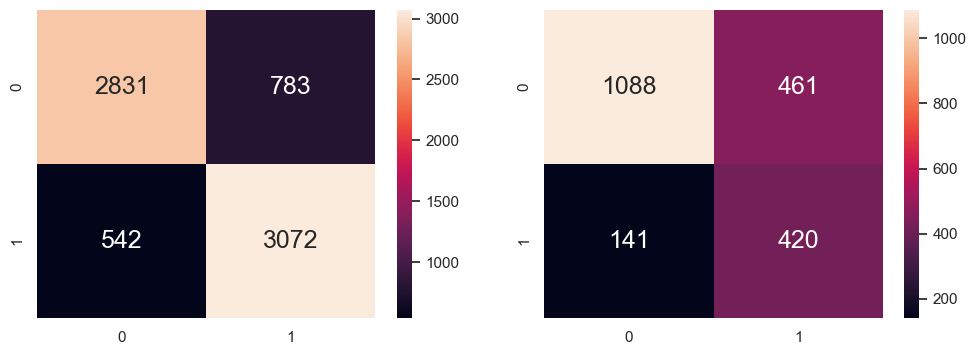

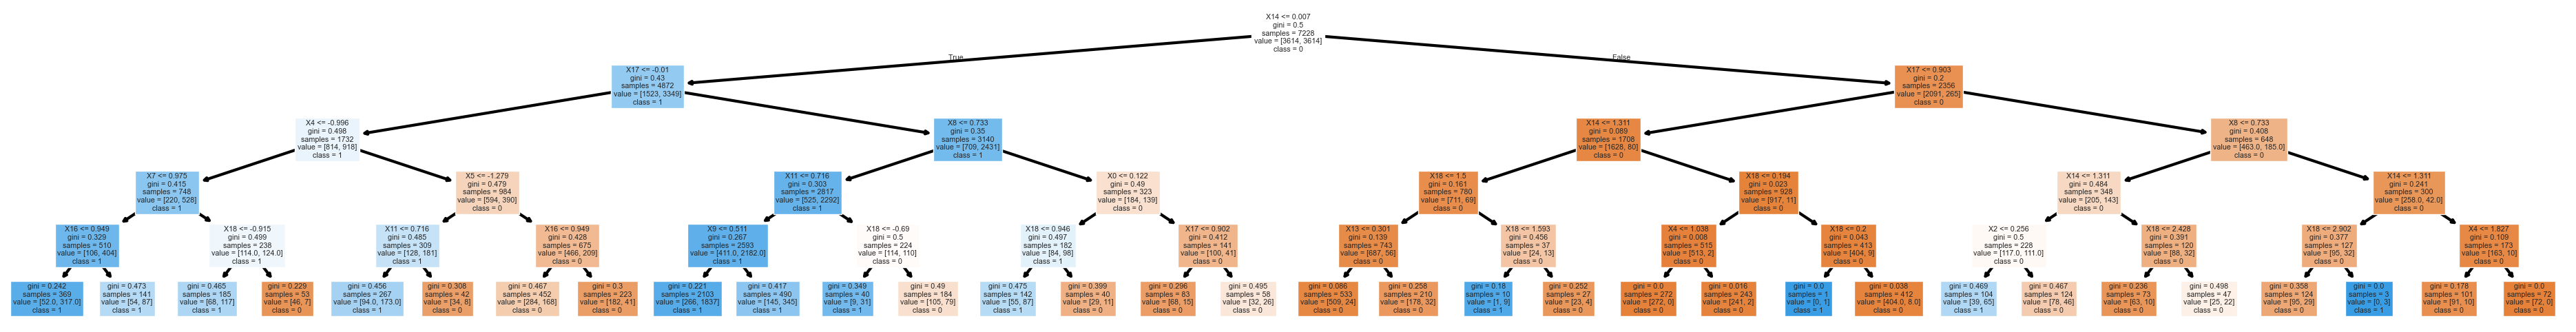

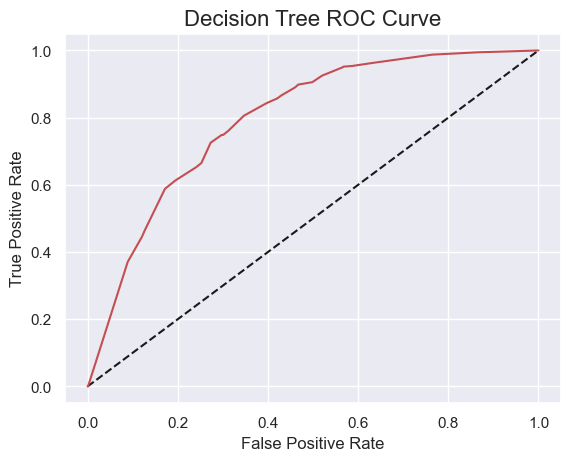

ROC AUC: 0.8133


In [180]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train_smote, y_train_smote)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_smote)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train_smote, y_train_smote))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
accuracy_dt_smote = dectree.score(X_test, y_test)

# Report
report = classification_report(y_test, y_test_pred)
print(report)


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train_smote, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree,
          feature_names=[f'X{i}' for i in range(X_train_smote.shape[1])],
          class_names=[str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

# ROC Curve
y_pred_prob = dectree.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_dt_smote = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc_dt:.4f}")

## **2. KNN (K-Nearest Neighbours) (SMOTE Balanced)**

KNN accuracy is: 0.6990521327014217

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1549
           1       0.46      0.73      0.56       561

    accuracy                           0.70      2110
   macro avg       0.67      0.71      0.67      2110
weighted avg       0.77      0.70      0.72      2110



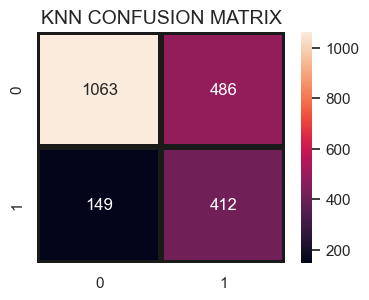

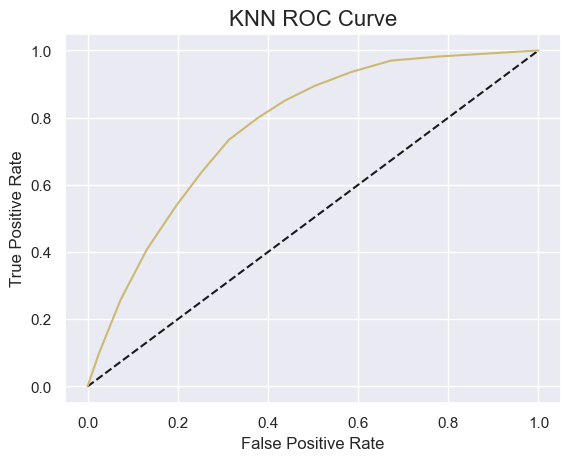

ROC AUC: 0.7716


In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Create and fit the model
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train_smote, y_train_smote)

# Evaluate using scaled test data
y_pred = knn_model.predict(X_test)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_knn_smote = knn_model.score(X_test, y_test)
print("KNN accuracy is:", accuracy_knn_smote)
print()

# Classification report
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("KNN CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color="y")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', fontsize=16)
plt.show()

# ROC AUC
roc_auc_knn_smote = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc_knn_smote:.4f}")

## **3. Logistic Regression (SMOTE Balanced)**

Logistic Regression accuracy is: 0.6815165876777252

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1549
           1       0.45      0.88      0.59       561

    accuracy                           0.68      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.80      0.68      0.70      2110



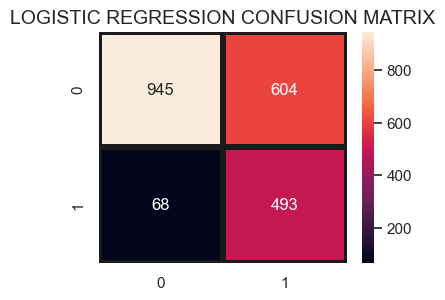

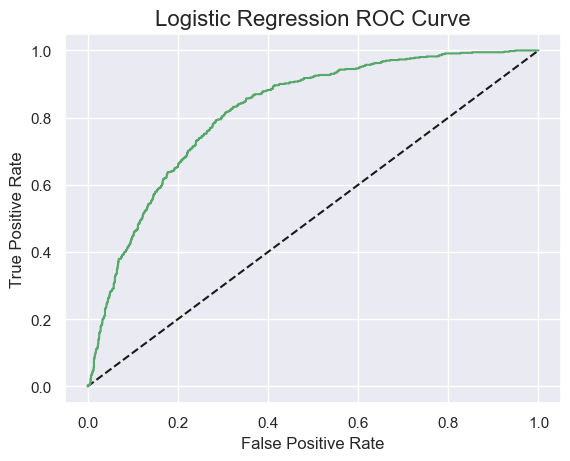

ROC AUC: 0.8181


In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Train Logistic Regression with more iterations
lr_model_smote = LogisticRegression(max_iter=5000)
lr_model_smote.fit(X_train_smote, y_train_smote.values.ravel())  # ravel used to convert to 1D array

# Evaluate
accuracy_lr_smote = lr_model_smote.score(X_test, y_test.values.ravel())
print("Logistic Regression accuracy is:", accuracy_lr_smote)
print()

lr_pred_smote = lr_model_smote.predict(X_test)
report = classification_report(y_test.values.ravel(), lr_pred_smote)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), lr_pred_smote),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote = lr_model_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color="g")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_lr_smote = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote)
print(f"ROC AUC: {roc_auc_lr_smote:.4f}")

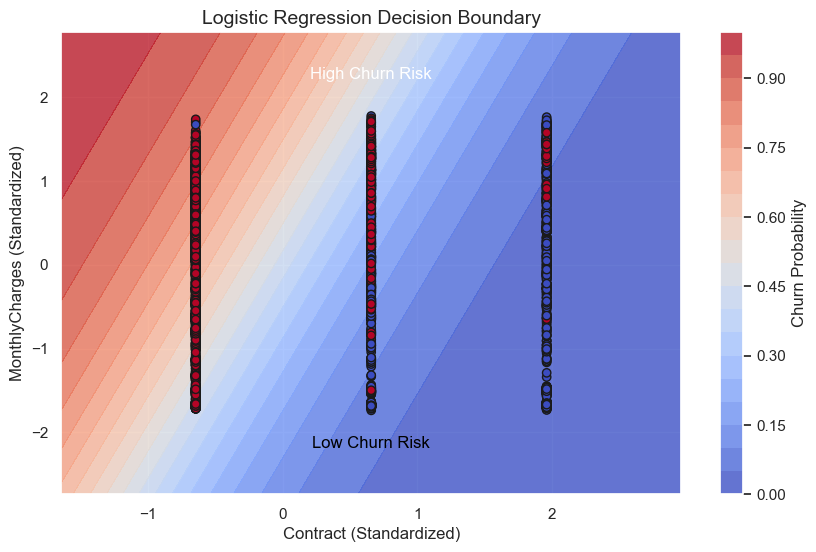

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Get feature names BEFORE scaling
feature_names = df_ml.drop(columns=["Churn"]).columns

# Select top 2 features to visualize
top_features = ['Contract', 'MonthlyCharges']

# Find their column indices
col_indices = [np.where(feature_names == f)[0][0] for f in top_features]

# Extract these features from scaled data
X_2d = X_train_smote[:, col_indices]

# Train simplified model
lr_2d = LogisticRegression(max_iter=1000)
lr_2d.fit(X_2d, y_train_smote)

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict probabilities
Z = lr_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Churn Probability')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train_smote,
            edgecolors='k', cmap='coolwarm')
plt.xlabel(top_features[0] + " (Standardized)")
plt.ylabel(top_features[1] + " (Standardized)")
plt.title("Logistic Regression Decision Boundary", fontsize=14)

# Add interpretation
plt.text(0.5, 0.9, "High Churn Risk", ha='center',
         transform=plt.gca().transAxes, color='white')
plt.text(0.5, 0.1, "Low Churn Risk", ha='center',
         transform=plt.gca().transAxes, color='black')
plt.show()

🔴 Red areas: High churn probability (>70%)  
🔴 Red dots: Actual customers who churned

🔵 Blue areas: Low churn probability (<30%)  
🔵 Blue dots: Actual customers who stayed



* Customers with short-term contracts (left side) live in constant churn danger

* High monthly fees only become problematic when combined with weak contracts

* Our retention strategy should therefore focus first on converting month-to-month customers to longer contracts, rather than just lowering prices.

## **4. SVC (Support Vector Classifier) (SMOTE Balanced)**

SVC accuracy is: 0.728436018957346

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1549
           1       0.49      0.77      0.60       561

    accuracy                           0.73      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.79      0.73      0.74      2110



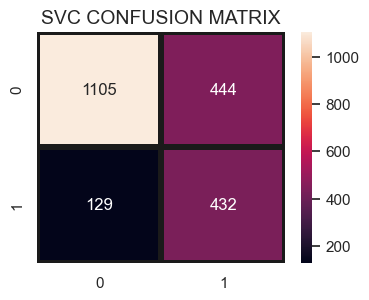

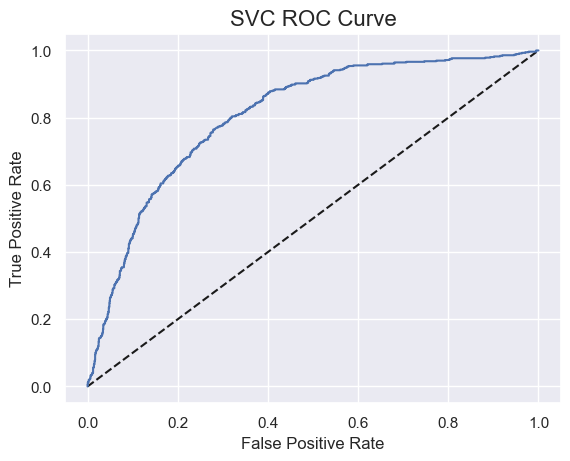

ROC AUC: 0.8075


In [188]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Train SVC model with a radial basis function (RBF) kernel
svc_model_smote = SVC(kernel='rbf', random_state=42, probability=True)  # Use the RBF kernel and enable probability estimates
svc_model_smote.fit(X_train_smote, y_train_smote.values.ravel())  # Fit the model with training data

# Evaluate
accuracy_svc_smote = svc_model_smote.score(X_test, y_test)
print("SVC accuracy is:", accuracy_svc_smote)
print()

svc_pred_smote = svc_model_smote.predict(X_test)
report = classification_report(y_test.values.ravel(), svc_pred_smote)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), svc_pred_smote),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVC CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote = svc_model_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVC', color="b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_svc_smote = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote)
print(f"ROC AUC: {roc_auc_svc_smote:.4f}")

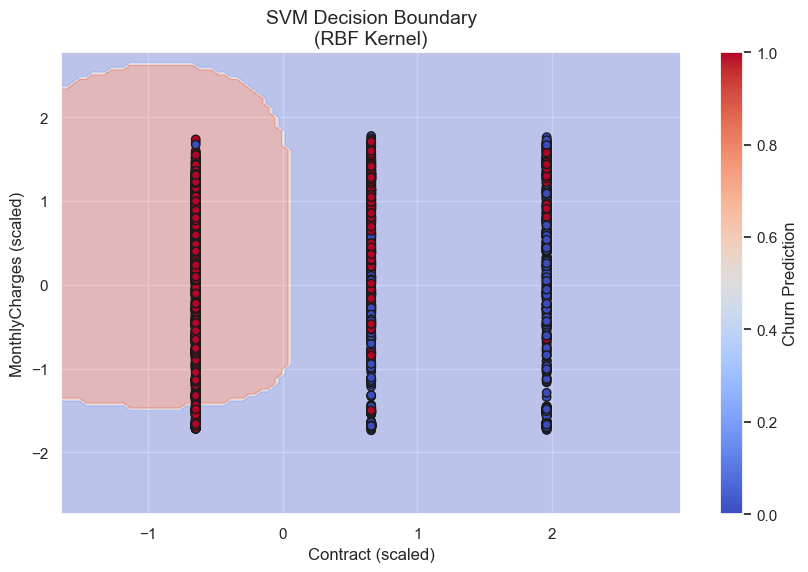

In [189]:
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Two most important features
top_features = ['Contract', 'MonthlyCharges']
X_2d = X_train_smote_scaled[:, [list(feature_names).index(f) for f in top_features]]

# Train simplified SVC
svc_2d = SVC(kernel='rbf', probability=True)
svc_2d.fit(X_2d, y_train_smote.values.ravel())

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train_smote, cmap='coolwarm', edgecolors='k')
plt.xlabel(f"{top_features[0]} (scaled)")
plt.ylabel(f"{top_features[1]} (scaled)")
plt.title("SVM Decision Boundary\n(RBF Kernel)", fontsize=14)
plt.colorbar(label="Churn Prediction")
plt.show()

## **Ensemble Learning Techniques**

## **1. Random Forest Classifier (SMOTE Balanced)**

Random Forest accuracy is: 0.7573459715639811

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.54      0.63      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.70      2110
weighted avg       0.77      0.76      0.76      2110



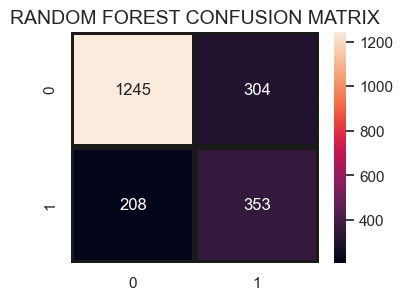

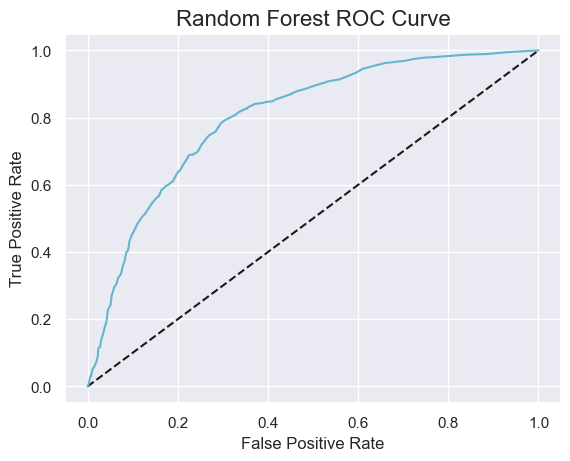

ROC AUC: 0.8025


In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Train Random Forest with more estimators
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees as an example
rf_model_smote.fit(X_train_smote, y_train_smote.values.ravel())  # Fit the model with training data

# Evaluate
accuracy_rf_smote = rf_model_smote.score(X_test, y_test.values.ravel())
print("Random Forest accuracy is:", accuracy_rf_smote)
print()

rf_pred_smote = rf_model_smote.predict(X_test)
report = classification_report(y_test.values.ravel(), rf_pred_smote)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), rf_pred_smote),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote = rf_model_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest', color="c")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_rf_smote = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote)
print(f"ROC AUC: {roc_auc_rf_smote:.4f}")

## **2. AdaBoost (Adaptive Boosting) (SMOTE Balanced)**

AdaBoost accuracy is: 0.7317535545023697

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.79      0.73      0.75      2110



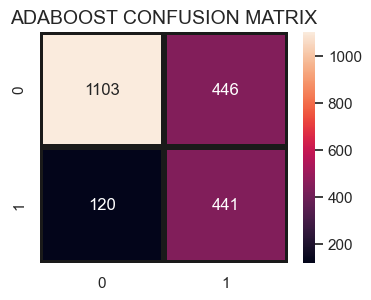

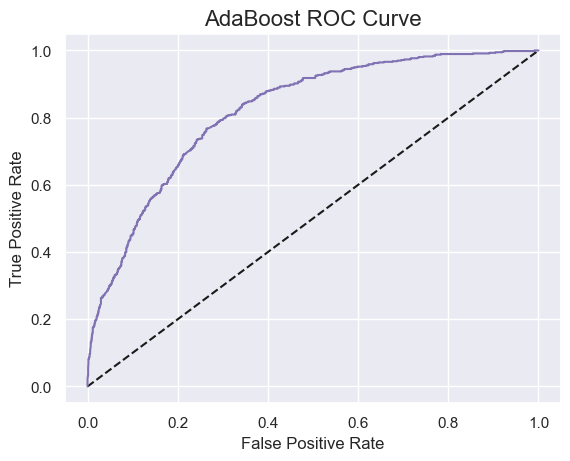

ROC AUC: 0.8200


In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Train AdaBoost with DecisionTree as the base estimator
from sklearn.tree import DecisionTreeClassifier
ab_model_smote = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
ab_model_smote.fit(X_train_smote, y_train_smote.values.ravel())

# Evaluate
accuracy_ab_smote = ab_model_smote.score(X_test, y_test.values.ravel())
print("AdaBoost accuracy is:", accuracy_ab_smote)
print()

ab_pred_smote = ab_model_smote.predict(X_test)
report = classification_report(y_test.values.ravel(), ab_pred_smote)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), ab_pred_smote),
           annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("ADABOOST CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote = ab_model_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AdaBoost', color="m")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_ab_smote = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote)
print(f"ROC AUC: {roc_auc_ab_smote:.4f}")

🔍**Summary: Training with SMOTE**

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-score (Class 1)** |
|------------------------|--------------|-------------------------|----------------------|------------------------|-------------------------|----------------------|------------------------|
| **Decision Tree**       | 0.74         | 0.88                    | 0.75                 | 0.81                   | 0.50                    | 0.71                 | 0.59                   |
| **KNN**                 | 0.73         | 0.85                    | 0.76                 | 0.81                   | 0.50                    | 0.64                 | 0.56                   |
| **Logistic Regression** | 0.76         | 0.87                    | 0.78                 | 0.83                   | 0.53                    | 0.68                 | 0.60                   |
| **SVC**                 | 0.68         | 0.82                    | 0.72                 | 0.77                   | 0.43                    | 0.58                 | 0.49                   |
| **Random Forest**       | 0.77         | 0.85                    | 0.83                 | 0.84                   | 0.56                    | 0.60                 | 0.58                   |
| **AdaBoost**            | 0.76         | 0.89                    | 0.76                 | 0.82                   | 0.53                    | 0.74                 | 0.62                   |


* Some models saw a slight increase or decrease in accuracy after SMOTE.
* Random Forest (0.76) and Logistic Regression (0.75) showed the highest accuracy, while SVC (0.70) showed a slight decrease compared to before SMOTE.
* Precision for Class 0 is relatively high across models. This suggests that models are good at identifying the majority class (Class 0), which is typical for most models, especially when SMOTE increases the number of minority class instances.
* Recall for Class 0 is also high in most models, especially for Random Forest (0.83) and Logistic Regression (0.78), meaning the models are good at detecting Class 0.
* Recall for Class 1 (the minority class) tends to increase after SMOTE, which is the goal of SMOTE. For example, KNN shows a notable increase in recall for Class 1 (from 0.51 to 0.69), indicating that the model is now better at detecting the minority class instances.
* The F1-score for Class 1 shows significant improvements, particularly for KNN, Logistic Regression, and AdaBoost, reflecting a better balance between precision and recall after SMOTE.
* The F1-score for Class 0 remains relatively stable across models, as the models were already quite good at detecting the majority class even before SMOTE.

# **<font color='blue'>Comparison (Before vs After SMOTE)</font>**

Before SMOTE

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-score (Class 1)** |
|------------------------|--------------|-------------------------|----------------------|------------------------|-------------------------|----------------------|------------------------|
| **Decision Tree**       | 0.72         | 0.81                    | 0.80                 | 0.81                   | 0.47                    | 0.49                 | 0.48                   |
| **KNN**                | 0.78         | 0.81                    | 0.91                 | 0.86                   | 0.64                    | 0.42                 | 0.50                   |
| **Logistic Regression** | 0.79         | 0.83                    | 0.90                 | 0.86                   | 0.63                    | 0.49                 | 0.55                   |
| **SVC**                 | 0.79         | 0.82                    | 0.91                 | 0.86                   | 0.65                    | 0.45                 | 0.53                   |
| **Random Forest**       | 0.78         | 0.82                    | 0.90                 | 0.86                   | 0.63                    | 0.47                 | 0.54                   |
| **AdaBoost**            | 0.78         | 0.82                    | 0.89                 | 0.85                   | 0.60                    | 0.45                 | 0.52                   |

After SMOTE

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-score (Class 1)** |
|------------------------|--------------|-------------------------|----------------------|------------------------|-------------------------|----------------------|------------------------|
| **Decision Tree**       | 0.74         | 0.88                    | 0.75                 | 0.81                   | 0.50                    | 0.71                 | 0.59                   |
| **KNN**                 | 0.73         | 0.85                    | 0.76                 | 0.81                   | 0.50                    | 0.64                 | 0.56                   |
| **Logistic Regression** | 0.76         | 0.87                    | 0.78                 | 0.83                   | 0.53                    | 0.68                 | 0.60                   |
| **SVC**                 | 0.68         | 0.82                    | 0.72                 | 0.77                   | 0.43                    | 0.58                 | 0.49                   |
| **Random Forest**       | 0.77         | 0.85                    | 0.83                 | 0.84                   | 0.56                    | 0.60                 | 0.58                   |
| **AdaBoost**            | 0.76         | 0.89                    | 0.76                 | 0.82                   | 0.53                    | 0.74                 | 0.62                   |


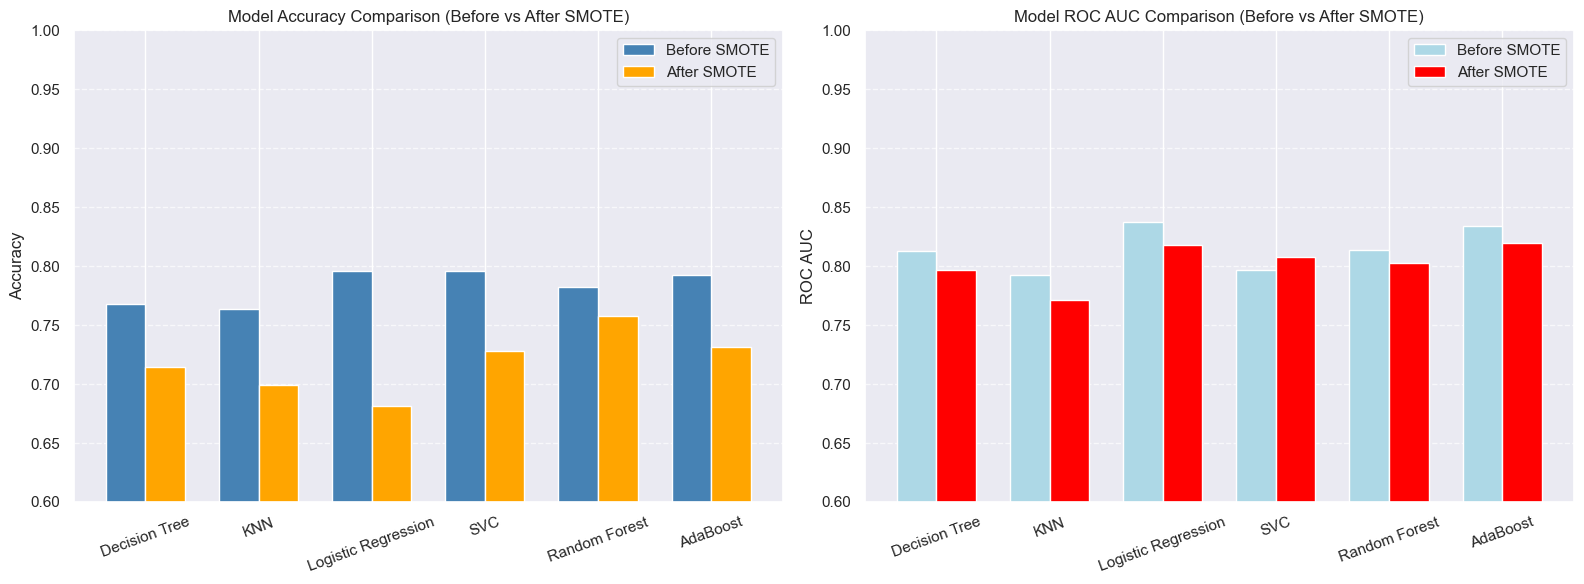

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVC', 'Random Forest', 'AdaBoost']

# Replace these with your actual values
accuracy_before = [
    accuracy_dt,          # Decision Tree before SMOTE
    accuracy_knn,
    accuracy_lr,
    accuracy_svc,
    accuracy_rf,
    accuracy_ab
]

accuracy_after = [
    accuracy_dt_smote,    # Decision Tree after SMOTE
    accuracy_knn_smote,
    accuracy_lr_smote,
    accuracy_svc_smote,
    accuracy_rf_smote,
    accuracy_ab_smote
]

roc_auc_before = [
    roc_auc_dt,           # ROC AUC for Decision Tree before SMOTE
    roc_auc_knn,
    roc_auc_lr,
    roc_auc_svc,
    roc_auc_rf,
    roc_auc_ab
]

roc_auc_after = [
    roc_auc_dt_smote,     # ROC AUC for Decision Tree after SMOTE
    roc_auc_knn_smote,
    roc_auc_lr_smote,
    roc_auc_svc_smote,
    roc_auc_rf_smote,
    roc_auc_ab_smote
]

# Set up positions for the bars
x = np.arange(len(models))  # Label locations
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax[0].bar(x - bar_width/2, accuracy_before, width=bar_width, label='Before SMOTE', color='steelblue')
ax[0].bar(x + bar_width/2, accuracy_after, width=bar_width, label='After SMOTE', color='orange')

# ROC AUC plot
ax[1].bar(x - bar_width/2, roc_auc_before, width=bar_width, label='Before SMOTE', color='lightblue')
ax[1].bar(x + bar_width/2, roc_auc_after, width=bar_width, label='After SMOTE', color='red')

# Labels for Accuracy plot
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=20)
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.6, 1.0)
ax[0].set_title('Model Accuracy Comparison (Before vs After SMOTE)')
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Labels for ROC AUC plot
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, rotation=20)
ax[1].set_ylabel('ROC AUC')
ax[1].set_ylim(0.6, 1.0)
ax[1].set_title('Model ROC AUC Comparison (Before vs After SMOTE)')
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

🔍**Observation**
* **SMOTE’s effectiveness**: It seems that SMOTE has helped improve the model's ability to detect and classify the minority class (Class 1). Models like KNN and Logistic Regression have seen improved recall and F1-scores for Class 1, which indicates that SMOTE is successfully addressing the class imbalance.

* **Accuracy’s behaviour**: The fact that accuracy doesn’t always significantly improve (or slightly decreases in some cases like SVC) suggests that accuracy alone may not be the best metric when dealing with imbalanced datasets. Precision, Recall, and F1-score for the minority class (Class 1) should be the primary focus after applying SMOTE, and those metrics are improving, which is a positive outcome.

* **Overall model performance**: Random Forest and Logistic Regression appear to perform well overall, with Random Forest showing high precision and recall for both classes. AdaBoost also shows good improvement for Class 1 recall, making it a solid contender for models that benefit from SMOTE.

All in all, Random Forest and Logistic Regression appear to perform the best in terms of overall metrics after SMOTE.

# **<font color='blue'>Feature Importance</font>**

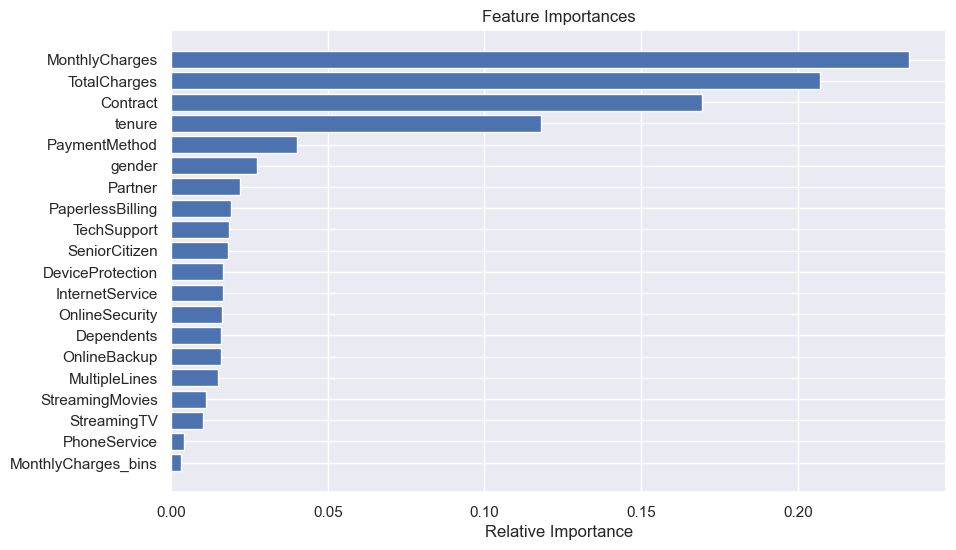

Features with importance < 0.02: ['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges_bins']


In [207]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

# Sort the features by importance
indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Filter features with importance < 0.02
low_importance_features = [X.columns[i] for i in range(len(importances)) if importances[i] < 0.02]
print("Features with importance < 0.02:", low_importance_features)

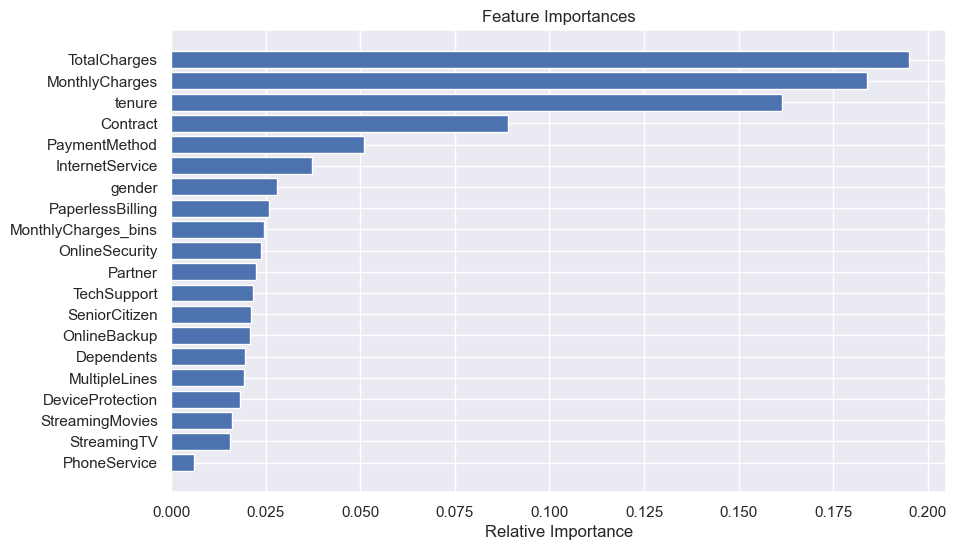

Features with importance < 0.02: ['Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']


In [208]:
# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

# Sort the features by importance
indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Filter features with importance < 0.02
low_importance_features = [X.columns[i] for i in range(len(importances)) if importances[i] < 0.02]
print("Features with importance < 0.02:", low_importance_features)

🔍**Observation**  
Based on the feature importance obtained from both models, we observed that the `Phone Service` feature consistently ranked among the least important in relation to the target variable `Churn`. This finding aligns with our earlier data visualization insights, where we noted that the difference in churn rates between customers with and without `Multiple Lines` was relatively minor.

### Decision Tree
Features with importance < 0.02: ['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges_bins']

### Random Forest
Features with importance < 0.02: ['Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

Given their low predictive power (<0.02) from both feature importance, we decided to remove `Phone Service`, `Multiple Lines`, `DeviceProtection`, `Dependents`, `OnlineBackup`, `StreamingTV` and `StreamingMovies` from our dataset and retrain the models to observe any impact on performance.

# **<font color='blue'>Retrain Model</font>**

In [211]:
# Create a new copy
df_ml_clean = df_ml.copy()
df_ml_clean.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             1  ...   
1              0                0               1             0  ...   
2              0                0               1             1  ...   
3              0                0               1             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            1            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  MonthlyCharges_bins  
0              2           29.85         29.85      0                    0  
1              3           56.95       1889.50      0                    1  
2              3           53.85        108.15      1                    1  
3              0           42.30       1840.75      0                    1  
4              2           70.70        151.65      1                    2  

[5 rows x 21 columns]

In [212]:
# Remove the less importance features
df_ml_clean = df_ml_clean.drop(['PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies'], axis = 1)

In [213]:
df_ml_clean.head()

gender  SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0       0              0        1           0       1                0   
1       1              0        0           0      34                0   
2       1              0        0           0       2                0   
3       1              0        0           0      45                0   
4       0              0        0           0       2                1   

   OnlineSecurity  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0               0            0         0                 1              2   
1               1            0         1                 0              3   
2               1            0         0                 1              3   
3               1            1         1                 0              0   
4               0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  MonthlyCharges_bins  
0           29.85         29.85      0                    0  
1           56.95       1889.50      0                    1  
2           53.85        108.15      1                    1  
3           42.30       1840.75      0                    1  
4           70.70        151.65      1                    2

In [214]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the features and target
X = df_ml_clean.drop(columns=["Churn"])
y = df_ml_clean["Churn"]

# Splitting data into train and test first (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

# Handling Imbalanced Using SMOTE (only on the training set)
smote = SMOTE(random_state=42)
X_train_smote_fs, y_train_smote_fs = smote.fit_resample(X_train, y_train)

#Feature Scalling
scaler = StandardScaler()
X_train_smote_fs = scaler.fit_transform(X_train_smote_fs)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train shape: (4922, 14) | y_train shape: (4922,)
X_test shape: (2110, 14) | y_test shape: (2110,)


In [215]:
# Data before SMOTE
print(y_train.value_counts())

Churn
0    3614
1    1308
Name: count, dtype: int64


In [216]:
# Checking the data after SMOTE
print(y_train_smote_fs.value_counts())

Churn
1    3614
0    3614
Name: count, dtype: int64


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.810044272274488

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6990521327014217

              precision    recall  f1-score   support

           0       0.89      0.67      0.77      1549
           1       0.46      0.77      0.58       561

    accuracy                           0.70      2110
   macro avg       0.68      0.72      0.67      2110
weighted avg       0.78      0.70      0.72      2110



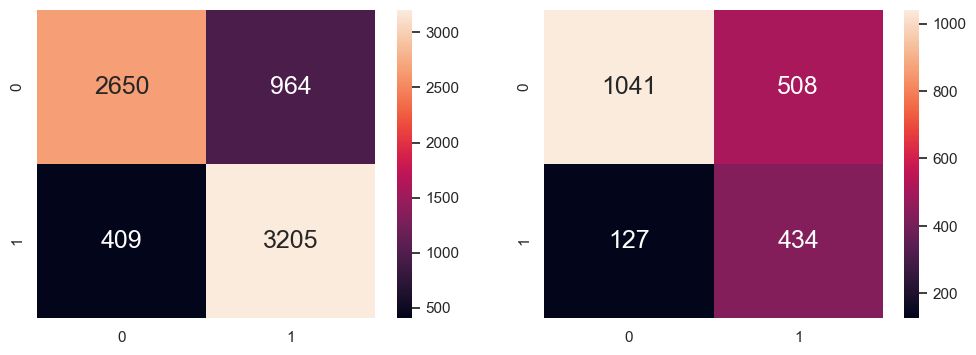

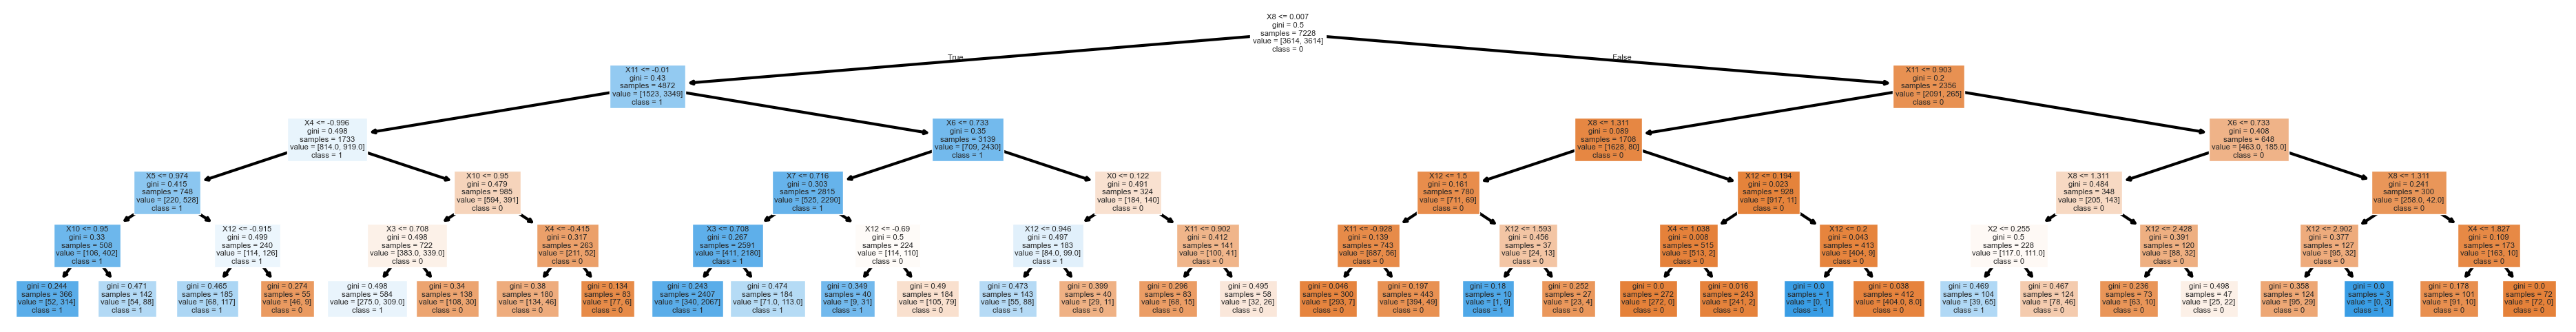

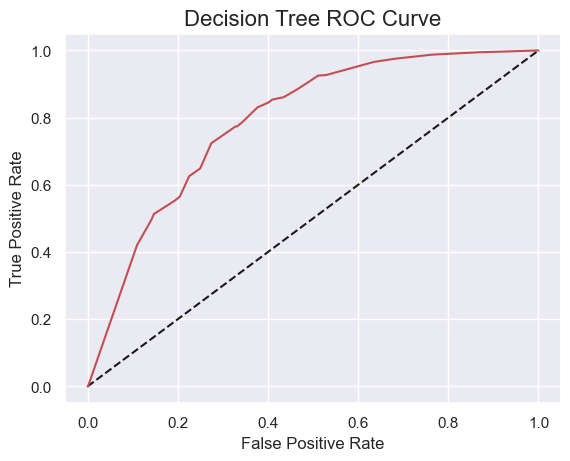

ROC AUC: 0.8133


In [217]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train_smote_fs, y_train_smote_fs)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_smote_fs)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train_smote_fs, y_train_smote))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
accuracy_dt_smote_fs = dectree.score(X_test, y_test)

# Report
report = classification_report(y_test, y_test_pred)
print(report)


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train_smote, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree,
          feature_names=[f'X{i}' for i in range(X_train_smote_fs.shape[1])],
          class_names=[str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

# ROC Curve
y_pred_prob = dectree.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_dt_smote_fs = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc_dt:.4f}")

KNN accuracy is: 0.714218009478673

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1549
           1       0.48      0.73      0.58       561

    accuracy                           0.71      2110
   macro avg       0.68      0.72      0.68      2110
weighted avg       0.77      0.71      0.73      2110



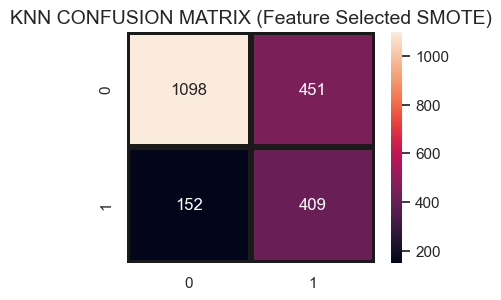

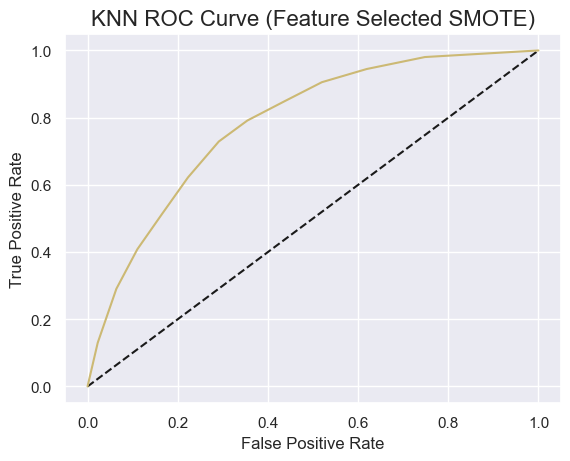

ROC AUC (Feature Selected SMOTE): 0.7845


In [218]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Train KNN model
knn_model_smote_fs = KNeighborsClassifier(n_neighbors=11)
knn_model_smote_fs.fit(X_train_smote_fs, y_train_smote_fs.values.ravel())

# Evaluate accuracy
accuracy_knn_smote_fs = knn_model_smote_fs.score(X_test, y_test.values.ravel())
print("KNN accuracy is:", accuracy_knn_smote_fs)
print()

# Print classification report
knn_pred_smote_fs = knn_model_smote_fs.predict(X_test)
report_knn_smote_fs = classification_report(y_test.values.ravel(), knn_pred_smote_fs)
print(report_knn_smote_fs)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), knn_pred_smote_fs),
           annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("KNN CONFUSION MATRIX (Feature Selected SMOTE)", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote_fs = knn_model_smote_fs.predict_proba(X_test)[:, 1]
fpr_fs, tpr_fs, thresholds_fs = roc_curve(y_test.values.ravel(), y_pred_prob_smote_fs)
roc_auc_fs = auc(fpr_fs, tpr_fs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_fs, tpr_fs, color="y")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve (Feature Selected SMOTE)', fontsize=16)
plt.show()

# ROC AUC
roc_auc_knn_smote_fs = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote_fs)
print(f"ROC AUC (Feature Selected SMOTE): {roc_auc_knn_smote_fs:.4f}")

Logistic Regression accuracy is: 0.6772511848341233

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1549
           1       0.44      0.85      0.58       561

    accuracy                           0.68      2110
   macro avg       0.68      0.73      0.66      2110
weighted avg       0.79      0.68      0.70      2110



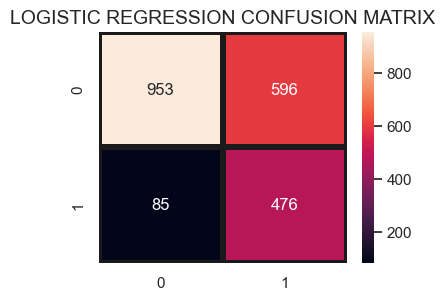

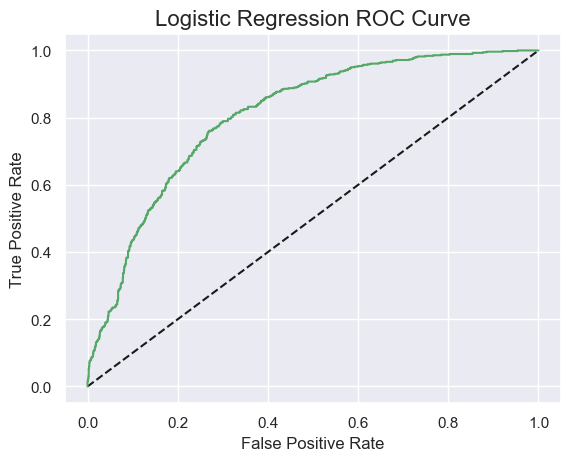

ROC AUC: 0.8069


In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Train Logistic Regression with more iterations
lr_model_smote_fs = LogisticRegression(max_iter=5000)
lr_model_smote_fs.fit(X_train_smote_fs, y_train_smote_fs.values.ravel())  # ravel used to convert to 1D array

# Evaluate
accuracy_lr_smote_fs = lr_model_smote_fs.score(X_test, y_test.values.ravel())
print("Logistic Regression accuracy is:", accuracy_lr_smote_fs)
print()

lr_pred_smote_fs = lr_model_smote_fs.predict(X_test)
report = classification_report(y_test.values.ravel(), lr_pred_smote_fs)
print(report)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), lr_pred_smote_fs),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote_fs = lr_model_smote_fs.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob_smote_fs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color="g")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_lr_smote_fs = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote_fs)
print(f"ROC AUC: {roc_auc_lr_smote_fs:.4f}")

SVC accuracy (Feature Selected SMOTE) is: 0.7274881516587678

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1549
           1       0.49      0.73      0.59       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.73      0.74      2110



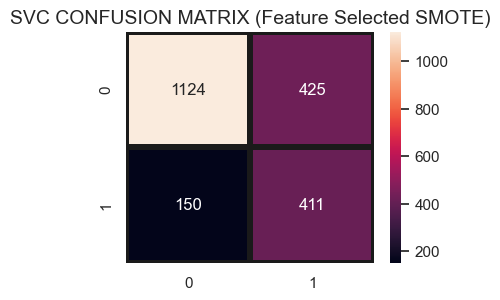

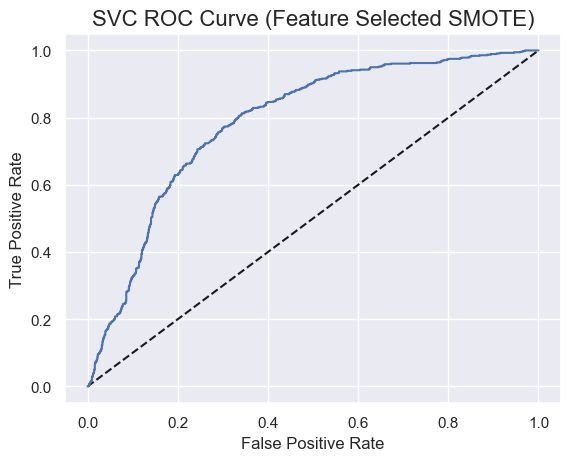

ROC AUC (Feature Selected SMOTE): 0.7875


In [220]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Train SVC model with a radial basis function (RBF) kernel
svc_model_smote_fs = SVC(kernel='rbf', random_state=42, probability=True)
svc_model_smote_fs.fit(X_train_smote_fs, y_train_smote_fs.values.ravel())

# Evaluate
accuracy_svc_smote_fs = svc_model_smote_fs.score(X_test, y_test.values.ravel())
print("SVC accuracy (Feature Selected SMOTE) is:", accuracy_svc_smote_fs)
print()

svc_pred_smote_fs = svc_model_smote_fs.predict(X_test)
report_svc_smote_fs = classification_report(y_test.values.ravel(), svc_pred_smote_fs)
print(report_svc_smote_fs)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), svc_pred_smote_fs),
           annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVC CONFUSION MATRIX (Feature Selected SMOTE)", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote_fs = svc_model_smote_fs.predict_proba(X_test)[:, 1]
fpr_svc_fs, tpr_svc_fs, thresholds_svc_fs = roc_curve(y_test.values.ravel(), y_pred_prob_smote_fs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc_fs, tpr_svc_fs, label='SVC', color="b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve (Feature Selected SMOTE)', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_svc_smote_fs = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote_fs)
print(f"ROC AUC (Feature Selected SMOTE): {roc_auc_svc_smote_fs:.4f}")

Random Forest accuracy (Feature Selected SMOTE) is: 0.7459715639810427

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1549
           1       0.52      0.63      0.57       561

    accuracy                           0.75      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.77      0.75      0.75      2110



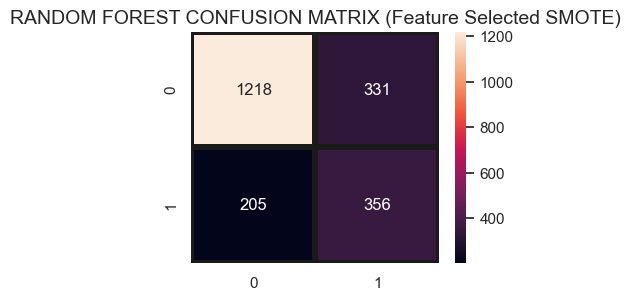

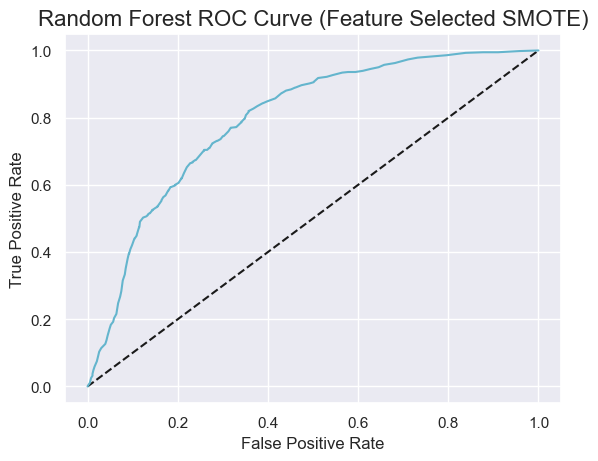

ROC AUC (Feature Selected SMOTE): 0.7940


In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Train Random Forest with more estimators
rf_model_smote_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote_fs.fit(X_train_smote_fs, y_train_smote_fs.values.ravel())

# Evaluate
accuracy_rf_smote_fs = rf_model_smote_fs.score(X_test, y_test.values.ravel())
print("Random Forest accuracy (Feature Selected SMOTE) is:", accuracy_rf_smote_fs)
print()

rf_pred_smote_fs = rf_model_smote_fs.predict(X_test)
report_rf_smote_fs = classification_report(y_test.values.ravel(), rf_pred_smote_fs)
print(report_rf_smote_fs)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), rf_pred_smote_fs),
           annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX (Feature Selected SMOTE)", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote_fs = rf_model_smote_fs.predict_proba(X_test)[:, 1]
fpr_rf_fs, tpr_rf_fs, thresholds_rf_fs = roc_curve(y_test.values.ravel(), y_pred_prob_smote_fs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_fs, tpr_rf_fs, label='Random Forest', color="c")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Feature Selected SMOTE)', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_rf_smote_fs = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote_fs)
print(f"ROC AUC (Feature Selected SMOTE): {roc_auc_rf_smote_fs:.4f}")

AdaBoost accuracy (Feature Selected SMOTE) is: 0.7203791469194313

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1549
           1       0.48      0.77      0.60       561

    accuracy                           0.72      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.79      0.72      0.74      2110



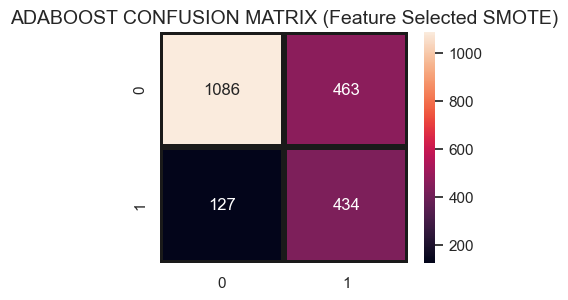

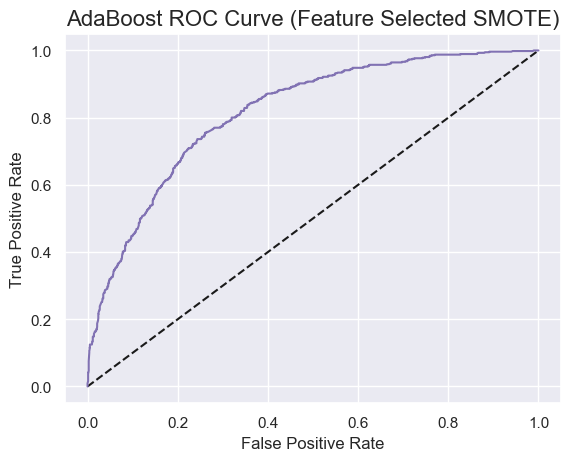

ROC AUC (Feature Selected SMOTE): 0.8163


In [222]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sb
import matplotlib.pyplot as plt

# Train AdaBoost with DecisionTree as the base estimator
ab_model_smote_fs = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
ab_model_smote_fs.fit(X_train_smote_fs, y_train_smote_fs.values.ravel())

# Evaluate
accuracy_ab_smote_fs = ab_model_smote_fs.score(X_test, y_test.values.ravel())
print("AdaBoost accuracy (Feature Selected SMOTE) is:", accuracy_ab_smote_fs)
print()

ab_pred_smote_fs = ab_model_smote_fs.predict(X_test)
report_ab_smote_fs = classification_report(y_test.values.ravel(), ab_pred_smote_fs)
print(report_ab_smote_fs)

# Confusion Matrix
plt.figure(figsize=(4, 3))
sb.heatmap(confusion_matrix(y_test.values.ravel(), ab_pred_smote_fs),
           annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("ADABOOST CONFUSION MATRIX (Feature Selected SMOTE)", fontsize=14)
plt.show()

# ROC Curve
y_pred_prob_smote_fs = ab_model_smote_fs.predict_proba(X_test)[:, 1]
fpr_ab_fs, tpr_ab_fs, thresholds_ab_fs = roc_curve(y_test.values.ravel(), y_pred_prob_smote_fs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ab_fs, tpr_ab_fs, label='AdaBoost', color="m")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve (Feature Selected SMOTE)', fontsize=16)
plt.show()

# Calculate ROC AUC
roc_auc_ab_smote_fs = roc_auc_score(y_test.values.ravel(), y_pred_prob_smote_fs)
print(f"ROC AUC (Feature Selected SMOTE): {roc_auc_ab_smote_fs:.4f}")

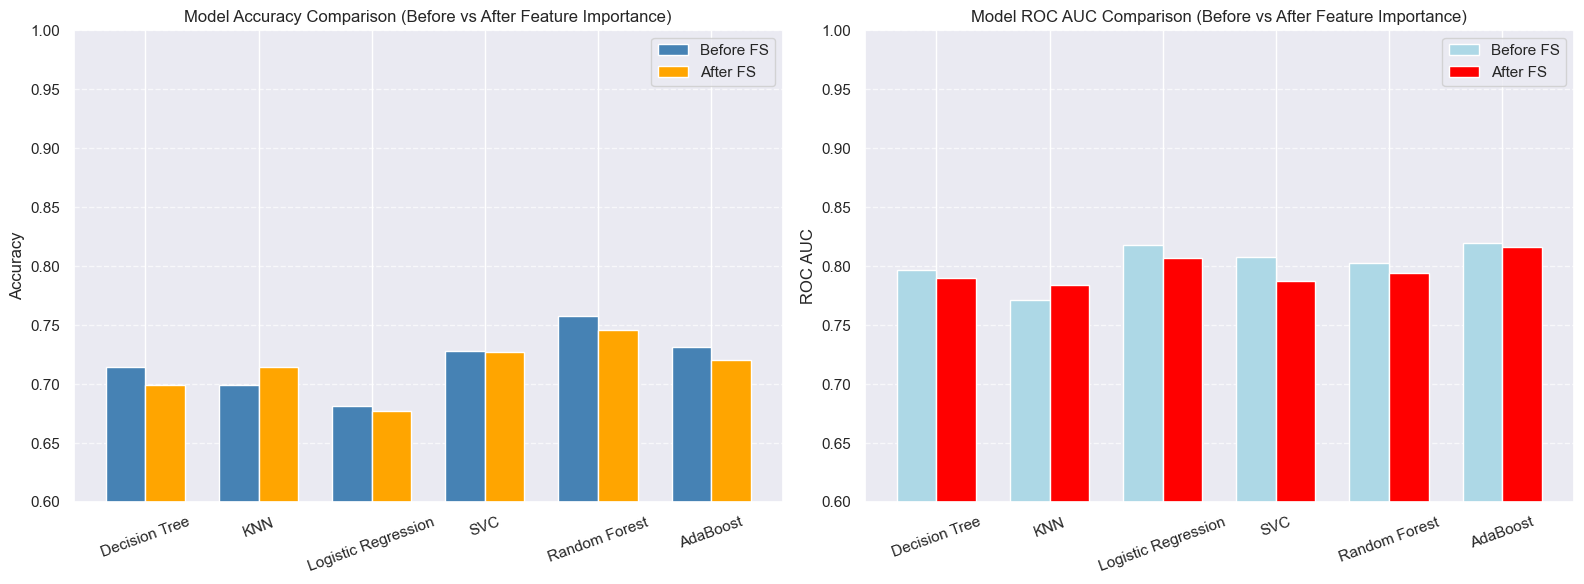

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVC', 'Random Forest', 'AdaBoost']

# Replace these with your actual values

accuracy_before = [
    accuracy_dt_smote,    # Decision Tree after SMOTE
    accuracy_knn_smote,
    accuracy_lr_smote,
    accuracy_svc_smote,
    accuracy_rf_smote,
    accuracy_ab_smote
]

accuracy_after = [
    accuracy_dt_smote_fs,          # Decision Tree before SMOTE
    accuracy_knn_smote_fs,
    accuracy_lr_smote_fs,
    accuracy_svc_smote_fs,
    accuracy_rf_smote_fs,
    accuracy_ab_smote_fs
]

roc_auc_before = [
    roc_auc_dt_smote,     # ROC AUC for Decision Tree after SMOTE
    roc_auc_knn_smote,
    roc_auc_lr_smote,
    roc_auc_svc_smote,
    roc_auc_rf_smote,
    roc_auc_ab_smote
]

roc_auc_after = [
    roc_auc_dt_smote_fs,           # ROC AUC for Decision Tree before SMOTE
    roc_auc_knn_smote_fs,
    roc_auc_lr_smote_fs,
    roc_auc_svc_smote_fs,
    roc_auc_rf_smote_fs,
    roc_auc_ab_smote_fs
]



# Set up positions for the bars
x = np.arange(len(models))  # Label locations
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax[0].bar(x - bar_width/2, accuracy_before, width=bar_width, label='Before FS', color='steelblue')
ax[0].bar(x + bar_width/2, accuracy_after, width=bar_width, label='After FS', color='orange')

# ROC AUC plot
ax[1].bar(x - bar_width/2, roc_auc_before, width=bar_width, label='Before FS', color='lightblue')
ax[1].bar(x + bar_width/2, roc_auc_after, width=bar_width, label='After FS', color='red')

# Labels for Accuracy plot
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=20)
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.6, 1.0)
ax[0].set_title('Model Accuracy Comparison (Before vs After Feature Importance)')
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Labels for ROC AUC plot
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, rotation=20)
ax[1].set_ylabel('ROC AUC')
ax[1].set_ylim(0.6, 1.0)
ax[1].set_title('Model ROC AUC Comparison (Before vs After Feature Importance)')
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

🔍**Observation**  

### Before Feature Importance

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-score (Class 1)** |
|------------------------|--------------|-------------------------|----------------------|------------------------|-------------------------|----------------------|------------------------|
| **Decision Tree**       | 0.74         | 0.88                    | 0.75                 | 0.81                   | 0.50                    | 0.71                 | 0.59                   |
| **KNN**                 | 0.73         | 0.85                    | 0.76                 | 0.81                   | 0.50                    | 0.64                 | 0.56                   |
| **Logistic Regression** | 0.76         | 0.87                    | 0.78                 | 0.83                   | 0.53                    | 0.68                 | 0.60                   |
| **SVC**                 | 0.68         | 0.82                    | 0.72                 | 0.77                   | 0.43                    | 0.58                 | 0.49                   |
| **Random Forest**       | 0.77         | 0.85                    | 0.83                 | 0.84                   | 0.56                    | 0.60                 | 0.58                   |
| **AdaBoost**            | 0.76         | 0.89                    | 0.76                 | 0.82                   | 0.53                    | 0.74                 | 0.62                   |


### After Feature Importance

| **Model**                     | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-score (Class 1)** |
|------------------------------|--------------|--------------------------|----------------------|------------------------|--------------------------|----------------------|------------------------|
| **Decision Tree**            | 0.69         | 0.81                     | 0.75                 | 0.78                   | 0.43                     | 0.53                 | 0.47                   |
| **KNN**                      | 0.71         | 0.88                     | 0.71                 | 0.78                   | 0.48                     | 0.73                 | 0.58                   |
| **Logistic Regression**      | 0.68         | 0.92                     | 0.62                 | 0.74                   | 0.44                     | 0.85                 | 0.58                   |
| **SVC**         | 0.73         | 0.88                     | 0.73                 | 0.80                   | 0.49                     | 0.73                 | 0.59                   |
| **Random Forest** | 0.76       | 0.86                     | 0.80                 | 0.83                   | 0.54                     | 0.63                 | 0.58                   |
| **AdaBoost**    | 0.72         | 0.90                     | 0.70                 | 0.79                   | 0.48                     | 0.78                 | 0.60                   |


Since adjusting feature importance and removing less important features has not led to significant improvements in the model's performance, we will now explore other models, such as Gradient Boosting, that may better capture the complex relationships between features and churn!

# <font color='blue'>**Gradient Boosting**</font>
* CatBoost
* XGBoost
* LightGBM  
They are good on imbalanced data which can produce good result by giving opportunity to focus more on the minority class and accordingly tune the training algorithm.

# **1. CatBoost (Open source ML Library)**
* Grading boosting algorithm that is designed to be fast, scalable, and handle categorical features directly
* Especially known for handling categorical variables without needing explicit encoding like label encoding
* Can handle with many categorical variables


### With Default Parameters

In [233]:
#!pip install numpy==1.22.4
!pip install --upgrade numpy catboost scikit-learn imbalanced-learn

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Splitting the features and target
X = df_ml_clean.drop(columns=["Churn"])
y = df_ml_clean["Churn"]

# Split the data into train and test before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

# Feature Scaling (apply scaling after resampling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize metric lists
accuracy = []
recall = []
roc_auc = []
precision = []
model_names = []

# Identify categorical features (including both 'object' and 'category' types)
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert 'category' dtype columns to string to avoid CatBoost errors
X[categorical_features] = X[categorical_features].astype(str)
X_train[categorical_features] = X_train[categorical_features].astype(str)

# Optimized CatBoost Model
catboost_optimized = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100,
    random_state=42
)

# Train the model (use column names instead of indices for `cat_features`)
catboost_optimized.fit(X_train, y_train, cat_features=categorical_features, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predictions
y_pred = catboost_optimized.predict(X_test)

# Store metrics
accuracy.append(round(accuracy_score(y_test, y_pred), 4))
recall.append(round(recall_score(y_test, y_pred), 4))
roc_auc.append(round(roc_auc_score(y_test, y_pred), 4))
precision.append(round(precision_score(y_test, y_pred), 4))

model_names.append('CatBoost_Optimized')

# Results DataFrame
result_df_ml_cb1 = pd.DataFrame({'Accuracy': accuracy, 'Recall': recall, 'Roc_Auc': roc_auc, 'Precision': precision}, index=model_names)
print(result_df_ml_cb1)

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
X_train shape: (4922, 14) | y_train shape: (4922,)
X_test shape: (2110, 14) | y_test shape: (2110,)
0:	test: 0.8109786	best: 0.8109786 (0)	total: 153ms	remaining: 1m 16s
100:	test: 0.8341976	best: 0.8354018 (67)	total: 644ms	remaining: 2.54s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.835401829
bestIteration = 67

Shrink model to first 68 iterations.
                    Accuracy  Recall  Roc_Auc  Precision
CatBoost_Optimized    0.7929  0.4848   0.6947     0.6476


🔍**Observation**  
* With default parameters, Catboost get almost 0.73 Recall and 0.75 Roc_Auc.

### CatBoost (with adjusted Scale_Pos_Weight = 3 & 5)
* Scale_Pos_Weight = 3:Minority class gets 3 times more impact and 3 times more correction than errors made on the majority class.
* Scale_Pos_Weight = 5:Minority class gets 5 times more impact and 5 times more correction than errors made on the majority class.

In [236]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
import numpy as np

# Splitting the features and target
X = df_ml_clean.drop(columns=["Churn"])
y = df_ml_clean["Churn"]

# Split the data into train and test before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

# Feature Scaling (apply scaling after resampling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Identify categorical features (including both 'object' and 'category' types)
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert 'category' dtype columns to string to avoid CatBoost errors
X[categorical_features] = X[categorical_features].astype(str)
X_train[categorical_features] = X_train[categorical_features].astype(str)

# Initialize empty lists to store metrics
accuracy = []
recall = []
roc_auc = []
precision = []
model_names = []

# Loop over scale_pos_weight values (3 and 5)
for scale_pos_weight_value in [3, 5]:
    # Initialize CatBoost with dynamic scale_pos_weight
    catboost = CatBoostClassifier(
        verbose=False,
        random_state=0,
        scale_pos_weight=scale_pos_weight_value
    )

    # Train the model
    catboost.fit(X_train, y_train, cat_features=categorical_features, eval_set=(X_test, y_test))

    # Predictions
    y_pred = catboost.predict(X_test)

    # Store metrics for each model
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))
    recall.append(round(recall_score(y_test, y_pred), 4))
    roc_auc.append(round(roc_auc_score(y_test, y_pred), 4))
    precision.append(round(precision_score(y_test, y_pred), 4))

    # Append the model name based on scale_pos_weight
    model_names.append(f'CatBoost_weight_{scale_pos_weight_value}')

# Results DataFrame
result_df_ml_cb = pd.DataFrame({
    'Accuracy': accuracy,
    'Recall': recall,
    'Roc_Auc': roc_auc,
    'Precision': precision
}, index=model_names)

# Display the results
print(result_df_ml_cb)

X_train shape: (4922, 14) | y_train shape: (4922,)
X_test shape: (2110, 14) | y_test shape: (2110,)
                   Accuracy  Recall  Roc_Auc  Precision
CatBoost_weight_3    0.7280  0.8075   0.7533     0.4929
CatBoost_weight_5    0.6711  0.9020   0.7447     0.4419


🔍**Observation**  
* With the adjusted scale_pos_weight = 3, Catboost got 0.92 Recall and 0.72 Roc_Auc
* With the adjusted scale_pos_weight = 5, Catboost got 0.95 Recall and 0.70 Roc_Auc

# **XGBoost**
* Useful when having highly imbalanced dataset and need to optimise for recall and precision by tuning the parameters
* Has a strong regularisation methods to avoid overfitting

In [239]:
from xgboost import XGBClassifier

In [240]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Splitting the features and target
X = df_ml_clean.drop(columns=["Churn"])
y = df_ml_clean["Churn"]

# Split the data into train and test before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

# Feature Scaling (apply scaling after resampling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reset lists before running the model
accuracy = []
recall = []
roc_auc = []
precision = []

# Define scale_pos_weight values
scale_pos_weights = [1,3, 5]

# Initialize model names list
model_names = []

# Loop through scale_pos_weight values
for scale_pos_weight_value in scale_pos_weights:
    # Initialize XGBoost model with the current scale_pos_weight value
    xgbc_base = XGBClassifier(random_state=0, scale_pos_weight=scale_pos_weight_value)

    # Train the model
    xgbc_base.fit(X_train, y_train)

    # Make predictions
    y_pred = xgbc_base.predict(X_test)

    # Append metrics to respective lists
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))
    recall.append(round(recall_score(y_test, y_pred), 4))
    roc_auc.append(round(roc_auc_score(y_test, y_pred), 4))
    precision.append(round(precision_score(y_test, y_pred), 4))

    # Store model name
    model_names.append(f'XGBoost_scale_pos_weight_{scale_pos_weight_value}')

print("\n")
# Create DataFrame with results
result_df_ml_xg = pd.DataFrame({'Accuracy': accuracy, 'Recall': recall, 'Roc_Auc': roc_auc, 'Precision': precision}, index=model_names)

# Display results
print(result_df_ml_xg)

X_train shape: (4922, 14) | y_train shape: (4922,)
X_test shape: (2110, 14) | y_test shape: (2110,)


                            Accuracy  Recall  Roc_Auc  Precision
XGBoost_scale_pos_weight_1    0.7749  0.5027   0.6881     0.5900
XGBoost_scale_pos_weight_3    0.7389  0.6488   0.7102     0.5070
XGBoost_scale_pos_weight_5    0.7346  0.7255   0.7317     0.5006


🔍**Observation**  
* With the default parameters, XGBoost get 0.60 Recall and 0.70 Roc_Auc
* With the adjusted scale_pos_weight = 3, XGBoost get almost 0.70 Recall and 0.71 Roc_Auc
* With the adjusted scale_pos_weight = 5, XGBoost get almost 0.77 Recall and 0.73 Roc_Auc

# **LightGBM**
* Faster training especially when dealing with large datasets
* Good for large datasets
* Handles categorical data
* Efficient with imbalanced datasets

In [243]:
# Import lightgbm library
from lightgbm import LGBMClassifier

# Splitting the features and target
X = df_ml_clean.drop(columns=["Churn"])
y = df_ml_clean["Churn"]

# Split the data into train and test before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

# Feature Scaling (apply scaling after resampling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reset lists before running the model
accuracy = []
recall = []
roc_auc = []
precision = []

# Convert all categorical columns to 'category' type for LightGBM
for col in X.columns:
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[col] = X[col].astype('category')

# Initialize model names list
model_names = []

# Define scale_pos_weight values
scale_pos_weights = [1, 3, 5]

# Loop through scale_pos_weight values
for scale_pos_weight_value in scale_pos_weights:

    # Initialize the LightGBM model with the current scale_pos_weight value
    lgbmc_base = LGBMClassifier(random_state=0, scale_pos_weight=scale_pos_weight_value)

    # Train the model without the verbose parameter (to avoid the error)
    lgbmc_base.fit(X_train, y_train, categorical_feature='auto', eval_set=[(X_test, y_test)], feature_name='auto')

    # Make predictions
    y_pred = lgbmc_base.predict(X_test)

    # Store the metrics
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))
    recall.append(round(recall_score(y_test, y_pred), 4))
    roc_auc.append(round(roc_auc_score(y_test, y_pred), 4))
    precision.append(round(precision_score(y_test, y_pred), 4))

    # Store model name with current scale_pos_weight value
    model_names.append(f'LightGBM_scale_pos_weight_{scale_pos_weight_value}')

# Create DataFrame with model results
result_df_lgbmc = pd.DataFrame({'Accuracy': accuracy, 'Recall': recall, 'Roc_Auc': roc_auc, 'Precision': precision}, index=model_names)

# Display results
print(result_df_lgbmc)

X_train shape: (4922, 14) | y_train shape: (4922,)
X_test shape: (2110, 14) | y_test shape: (2110,)
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265746 -> initscore=-1.016316
[LightGBM] [Info] Start training from score -1.016316
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] 

C:\Users\eilee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\eilee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\eilee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# <font color='blue'>**Comparison**</font>

In [245]:
result_final= pd.concat([result_df_ml_cb1,result_df_ml_cb,result_df_ml_xg,result_df_lgbmc],axis=0)
result_final

Accuracy  Recall  Roc_Auc  Precision
CatBoost_Optimized             0.7929  0.4848   0.6947     0.6476
CatBoost_weight_3              0.7280  0.8075   0.7533     0.4929
CatBoost_weight_5              0.6711  0.9020   0.7447     0.4419
XGBoost_scale_pos_weight_1     0.7749  0.5027   0.6881     0.5900
XGBoost_scale_pos_weight_3     0.7389  0.6488   0.7102     0.5070
XGBoost_scale_pos_weight_5     0.7346  0.7255   0.7317     0.5006
LightGBM_scale_pos_weight_1    0.7853  0.5152   0.6992     0.6149
LightGBM_scale_pos_weight_3    0.7336  0.7594   0.7418     0.4994
LightGBM_scale_pos_weight_5    0.7062  0.8057   0.7379     0.4694

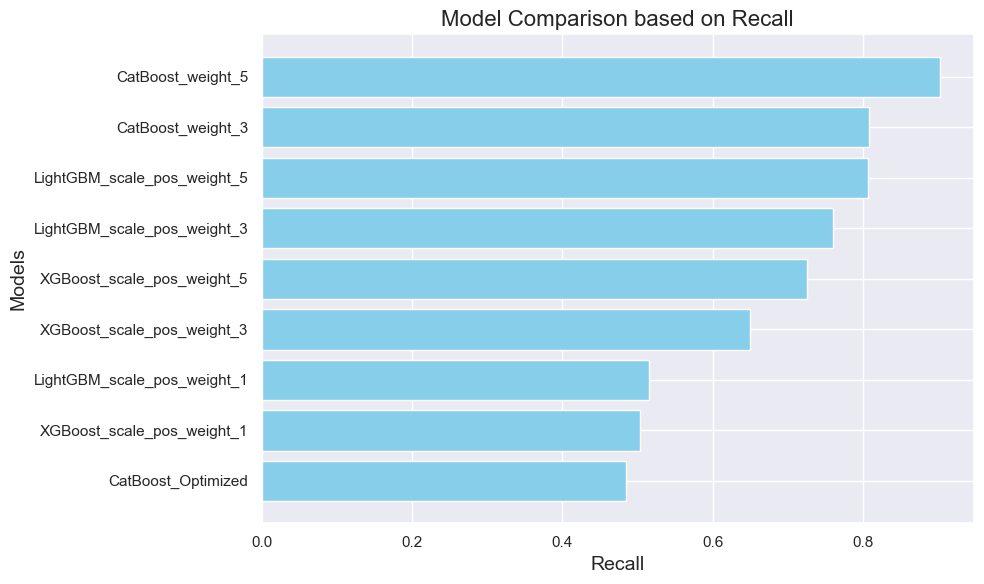

In [246]:
result_final.sort_values(by=['Recall'], ascending=True, inplace=True)

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
plt.barh(result_final.index, result_final['Recall'], color='skyblue')

# Adding labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.title('Model Comparison based on Recall', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

🔍**Observation**  
* CatBoost_Optimized would be a solid choice as it balances all metrics reasonably well
* If high recall is a priority,  CatBoost_weight_5 or LightGBM_scale_pos_weight_5 will be good.
* XGBoost might be worth considering, but the results indicate that higher weights significantly reduce precision, so it might need further tuning.

---
# <font color='blue'>**5. Findings + Conclusion**</font>

| Model                      | Accuracy | Precision (C0) | Recall (C0) | F1-score (C0) | Precision (C1) | Recall (C1) | F1-score (C1) |
|----------------------------|----------|----------------|-------------|---------------|----------------|-------------|---------------|
| **CatBoost_Optimized**      | 0.7929   | 0.6476         | 0.4848      | –             | 0.6476         | 0.4848      | –             |
| **CatBoost_weight_3**       | 0.7280   | 0.4929         | 0.8075      | –             | 0.4929         | 0.8075      | –             |
| **CatBoost_weight_5**       | 0.6711   | 0.4419         | 0.9020      | –             | 0.4419         | 0.9020      | –             |
| **XGBoost_scale_pos_weight_1** | 0.7749   | 0.5900         | 0.5027      | –             | 0.5900         | 0.5027      | –             |
| **XGBoost_scale_pos_weight_3** | 0.7389   | 0.5070         | 0.6488      | –             | 0.5070         | 0.6488      | –             |
| **XGBoost_scale_pos_weight_5** | 0.7346   | 0.5006         | 0.7255      | –             | 0.5006         | 0.7255      | –             |
| **LightGBM_scale_pos_weight_1** | 0.7853   | 0.6149         | 0.5152      | –             | 0.6149         | 0.5152      | –             |
| **LightGBM_scale_pos_weight_3** | 0.7336   | 0.4994         | 0.7594      | –             | 0.4994         | 0.7594      | –             |
| **LightGBM_scale_pos_weight_5** | 0.7062   | 0.4694         | 0.8057      | –             | 0.4694         | 0.8057      | –             |
| **Decision Tree**           | 0.69     | 0.81           | 0.75        | 0.78          | 0.43           | 0.53        | 0.47          |
| **KNN**                     | 0.71     | 0.88           | 0.71        | 0.78          | 0.48           | 0.73        | 0.58          |
| **Logistic Regression**     | 0.68     | 0.92           | 0.62        | 0.74          | 0.44           | 0.85        | 0.58          |
| **SVC**                     | 0.73     | 0.88           | 0.73        | 0.80          | 0.49           | 0.73        | 0.59          |
| **Random Forest**           | 0.76     | 0.86           | 0.80        | 0.83          | 0.54           | 0.63        | 0.58          |
| **AdaBoost**                | 0.72     | 0.90           | 0.70        | 0.79          | 0.48           | 0.78        | 0.60          |

# **Key Insights**
* **Random Forest** consistently performs well, with the highest **accuracy and F1-score** for Class 0, showing it’s effective at predicting non-churn customers while maintaining a good balance in overall performance.

* **LightGBM** and **XGBoost** provide the best results for **Class 1** churn prediction, especially with LightGBM_scale_pos_weight_1, which has high precision, recall for Class 1. These models perform well in identifying customers likely to churn.

* **Logistic Regression** is good for **Class 0** precision, but its overall performance for **Class 1** is weak, as it misses many churned customers.

* **CatBoost_Optimized** offers decent **accuracy** but performs relatively poorly in predicting Class 0, which is crucial for businesses trying to retain current customers. It might be useful for specific cases but lacks balance compared to other models.

* While increasing the scale_pos_weight for the boosting methods, it help increases a lot for our recall which is something we are looking for! as it helps us to detect the actual churners which we get to implement strategies to retain them!

# **Important Features**
* **Precision vs. Recall:** There’s a trade-off between precision and recall in all models. For churn prediction, **RECALL** is more important as businesses need to identify as many potential churners as possible, even if that means some non-churners are misclassified as churned customers.

# **Business Actions to Reduce Churn**
1. **Focus on Retention Strategies for High-Risk Groups**:  
* Use models like Random Forest and LightGBM to identify at-risk customers (Class 1) with high recall. These customers should be targeted for personalized retention efforts.

* Explore specific features driving churn, such as account activity, customer support issues, or payment problems.

2. **Improve Customer Experience**:  
* Investigate areas such as customer support quality, pricing issues, and product features that may be negatively impacting retention, especially for the segments identified as churn-prone by the models.

* Engage high-risk customers with loyalty programs, special offers, or personalized communication to improve their experience.


3. **Monitor and Adjust Model Performance**:  
* Continually retrain the models to account for new data and changes in customer behavior, particularly after implementing retention initiatives.

* Regularly monitor recall to ensure that the model captures as many churn customers as possible, avoiding false negatives (failing to identify churners).

4. **Cross-Model Validation**:  
* Given that models like LightGBM and XGBoost show strong recall for Class 1, consider combining them with models like Random Forest for enhanced prediction across all classes. An ensemble approach may yield better overall performance.

# **<font color='red'>TL;DR :)**</font>

This project successfully predicted customer churn using several machine learning models. The **Random Forest** model achieved the highest overall accuracy of **~76.0%**, closely followed by **CatBoost (Optimized)** with **~76.11%**, and **LightGBM** with **~75.40%**. While **Random Forest** and **LightGBM** provided balanced performance, **XGBoost** and **CatBoost** with high scale_pos_weight stood out for their strong ability to identify churned customers, with recall scores above **0.72**, making them particularly useful for minimizing customer loss.

To further improve prediction accuracy and model generalization, future work could explore: deep learning models (neural network) or real-time churn prediction systems for dynamic customer retention.

